<a href="https://colab.research.google.com/github/renzo1836/ProyectoDataScience1/blob/main/PROYECTO_FINAL_VALDEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRE ENTREGA - PROYECTO FINAL**

**DATA SCIENCE**


Nombre y apellido: Renzo Valdez Aquino


***Abstract***: *El presente trabajo pretende analizar una base de datos que re√∫ne las respuestas de una encuesta elaborada por LAPOP (instituto de investigaci√≥n de la Vanderbilt University) para conformar el Bar√≥metro de las Am√©ricas 2023 (informe que se realiza con los datos relevados en los pa√≠ses de la regi√≥n y que busca estudiar los valores democr√°ticos en las Am√©ricas). La encuesta que analizaremos ser√° la realizada en Per√∫ en el a√±o 2023. No analizaremos todas las preguntas, sino que hicimos una selecci√≥n de quince preguntas vinculdas a la confianza en instituciones y la democracia como forma de gobierno. Tampoco analizaremos a toda la muestra, sino a una porci√≥n de ella: los j√≥venes*


En este punto es necesario aclarar que las respuestas a las preguntas est√°n codificadas. El manual de c√≥digos puede ser revisado en la carpeta Drive en el que se ubica este informe.




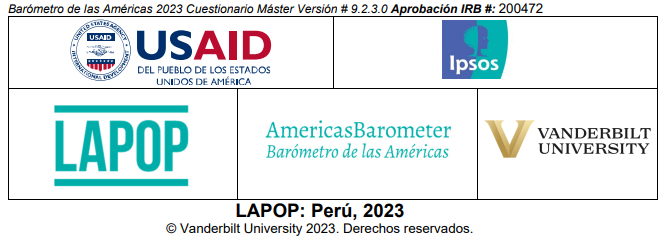

Preguntas:
1. C√≥mo se da la relaci√≥n entre el g√©nero y el respeto a las instituciones
2. C√≥mo se da la relaci√≥n entre el g√©nero y el inter√©s en la pol√≠tica en los encuestados.

Hip√≥tesis:
1. Las personas, tanto de g√©nero masculino como femenino, en un rango etario de 18 a 29 a√±os tienen niveles parecidos de confianza en las instituciones
2. En un rango etario de 18 a 29 a√±os, no se perciben diferencias relevantes en el inter√©s por la pol√≠tica seg√∫n el g√©nero.


In [228]:
pip install pyspssio #El archivo con el que contamos, es un archivo .sav de SPSS, por lo cual instalamos lo siguiente


In [229]:
#Importamos la siguiente biblioteca para leer y escribir archivos SPSS (.sav y .zsav)
import pyspssio

In [230]:
import matplotlib as mpl  # Importa la biblioteca Matplotlib con el alias "mpl".
import matplotlib.pyplot as plt  # Importa el subm√≥dulo pyplot de Matplotlib con el alias "plt".
#import seaborn as sns  # Importa la biblioteca Seaborn.
import pandas as pd  # Importa la biblioteca Pandas con el alias "pd"
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy import stats                    # Importa stats desde scipy para an√°lisis estad√≠stico
import numpy as np                         # Importa numpy para operaciones num√©ricas
import statsmodels.formula.api as sm       # Importa statsmodels para modelado estad√≠stico
import os                                  # Importa os para funcionalidades del sistema operativo
import statsmodels.formula.api as smf

# Configuraci√≥n de Bokeh
from bokeh.resources import INLINE         # Importa INLINE desde bokeh.resources para renderizado de Bokeh
import bokeh.io                            # Importa bokeh.io para interactividad con Bokeh

# Configuraci√≥n de recursos Bokeh
bokeh.io.output_notebook(INLINE)           # Habilita la salida de Bokeh en el notebook

In [231]:
#Leemos el archivo con la encuesta (ya guardada en Drive) con el siguiente c√≥digo. Con 'df' visualizamos el dataset completo, que tiene un total de 1535 filas por 197 columnas.
#Cada columna es una pregunta de la encuesta
df, meta = pyspssio.read_sav('/content/drive/MyDrive/CSVs Coder/PER_2023_LAPOP_AmericasBarometer_v1.0_w.sav')
df #llamamos la dataframe para corroborar que se carg√≥ todo. Vemos que son 197 columas (cada una es una pregunta) y 1535 registros

idnum  pais  nationality  estratopri  estratosec  strata    prov  \
0     2277.0  11.0         11.0      1103.0         1.0  1103.0  1115.0   
1     9874.0  11.0         11.0      1103.0         1.0  1103.0  1115.0   
2     2387.0  11.0         11.0      1103.0         1.0  1103.0  1115.0   
3     2585.0  11.0         11.0      1103.0         1.0  1103.0  1115.0   
4     3828.0  11.0         11.0      1103.0         1.0  1103.0  1115.0   
...      ...   ...          ...         ...         ...     ...     ...   
1530  8576.0  11.0         11.0      1105.0         3.0  1105.0  1112.0   
1531   499.0  11.0         11.0      1105.0         3.0  1105.0  1112.0   
1532  9144.0  11.0         11.0      1105.0         3.0  1105.0  1112.0   
1533  8217.0  11.0         11.0      1105.0         3.0  1105.0  1112.0   
1534  5077.0  11.0         11.0      1105.0         3.0  1105.0  1112.0   

       municipio   perprov   upm  ...  psc13n_13  psc13n_77  colorr  noise1  \
0     11150101.0  111501.0  80.0  ...        0.0        0.0     3.0     1.0   
1     11150112.0  111501.0  26.0  ...        0.0        0.0     3.0     2.0   
2     11150112.0  111501.0  26.0  ...        0.0        0.0     4.0     0.0   
3     11150112.0  111501.0  26.0  ...        0.0        0.0     4.0     2.0   
4     11150101.0  111501.0  80.0  ...        0.0        0.0     4.0     0.0   
...          ...       ...   ...  ...        ...        ...     ...     ...   
1530  11120125.0  111201.0  13.0  ...        0.0        0.0     5.0     2.0   
1531  11120125.0  111201.0  13.0  ...        0.0        0.0     4.0     0.0   
1532  11120125.0  111201.0  13.0  ...        0.0        0.0     4.0     1.0   
1533  11120125.0  111201.0  13.0  ...        0.0        0.0     5.0     0.0   
1534  11120125.0  111201.0  13.0  ...        0.0        0.0     4.0     0.0   

      conocim  sexin  colori  formatq  idiomaq      fecha  
0         3.0    1.0     3.0      4.0      1.0  10apr2023  
1         3.0    1.0     3.0      4.0      1.0  20mar2023  
2         2.0    1.0     3.0      4.0      1.0  20mar2023  
3         4.0    1.0     3.0      4.0      1.0  30mar2023  
4         1.0    1.0     3.0      4.0      1.0  15apr2023  
...       ...    ...     ...      ...      ...        ...  
1530      2.0    2.0     3.0      4.0      1.0  14apr2023  
1531      2.0    2.0     3.0      4.0      1.0  19mar2023  
1532      3.0    2.0     3.0      4.0      1.0  16apr2023  
1533      3.0    2.0     3.0      4.0      1.0  12apr2023  
1534      3.0    2.0     3.0      4.0      1.0  18mar2023  

[1535 rows x 197 columns]

In [232]:
#Hacemos el siguiente c√≥digo para seleccionar las columnas de nuestro inter√©s
s_df = df [['q2','q1tc_r','b2','b13','b21','b21a', 'pol1','vb10','l1n','soct2','dem30','pn4','lib2c','ocup4a','b4']]
s_df.head()

q2  q1tc_r   b2  b13  b21  b21a  pol1  vb10  l1n  soct2  dem30  pn4  \
0  47.0     2.0  1.0  1.0  1.0   1.0   4.0   2.0  1.0    3.0    2.0  3.0   
1  26.0     2.0  2.0  3.0  3.0   4.0   2.0   2.0  5.0    3.0    2.0  3.0   
2  55.0     2.0  6.0  1.0  1.0   5.0   4.0   2.0  8.0    3.0    1.0  4.0   
3  44.0     2.0  5.0  3.0  3.0   3.0   2.0   2.0  5.0    3.0    1.0  2.0   
4  68.0     1.0  6.0  5.0  5.0   3.0   1.0   1.0  9.0    2.0    1.0  3.0   

   lib2c  ocup4a   b4  
0    1.0     3.0  1.0  
1    2.0     2.0  3.0  
2    2.0     6.0  7.0  
3    1.0     1.0  4.0  
4    2.0     6.0  6.0

‚úÖ‚úãüèΩ En este punto, es necesario aclarar c√≥mo vamos a renombrar las columnas que hemos seleccionado. Debemos tener presente que cada columna representa un pregunta de nuestra encuesta, por lo que aclararemos de qu√© pregunta estamos hablando üì¢

* üéÇ  q2: ¬øCu√°l es su edad en a√±os cumplidos? ‚û°Ô∏è **Edad**
* ‚ôÄ üè≥Ô∏è‚Äçüåà ‚ôÇ q1tc_r: Para fines estad√≠sticos, por favor, ¬øme   podr√≠a confirmar su g√©nero? ‚û°Ô∏è **G√©nero**
* üèõÔ∏è b2: ¬øHasta qu√© punto tiene usted respeto por las instituciones pol√≠ticas de Per√∫? ‚û°Ô∏è **P1**
* üìö b13: ¬øHasta qu√© punto tiene usted confianza en el Congreso? ‚û°Ô∏è **P2**
* ü§ù b21: ¬øHasta qu√© punto tiene usted confianza en los partidos pol√≠ticos? ‚û°Ô∏è **P3**
* üôãüèΩ‚Äç‚ôÄÔ∏è b21a: ¬øHasta qu√© punto tiene usted confianza en la presidenta? ‚û°Ô∏è **P4**
* üßê pol1: ¬øQu√© tanto inter√©s tiene usted en la pol√≠tica: mucho, algo, poco o nada? ‚û°Ô∏è **P5**
* ü´Ç'vb10': ¬øEn este momento, simpatiza con alg√∫n partido pol√≠tico? ‚û°Ô∏è **P6**
* ü´Ä 'l1n': Cambiando de tema, en esta tarjeta tenemos una **escala** del 1 a 10 que va de **izquierda a derecha**, en la que el 1 significa izquierda y el 10 significa derecha. Seg√∫n el sentido que tengan para usted los t√©rminos "izquierda" y "derecha" cuando piensa sobre su punto de vista pol√≠tico, ¬ød√≥nde se encontrar√≠a usted en esta escala? D√≠game el n√∫mero. ‚û°Ô∏è **P7**
* üëÅÔ∏è 'soct2': ¬øConsidera usted que la **situaci√≥n** econ√≥mica del **pa√≠s** es mejor, igual o peor que hace doce meses? ‚û°Ô∏è **P8**
* üó≥Ô∏è 'dem30': ¬øEn su opini√≥n, **Per√∫** es una **democracia**? ‚û°Ô∏è **P9**
* üíØ pn4: En general, ¬øusted dir√≠a que est√° muy satisfecho(a), satisfecho(a), insatisfecho(a) o muy insatisfecho(a) con la forma en que la democracia en Per√∫? ‚û°Ô∏è **P10**
* üó£Ô∏è'lib2c': Usted cree que ahora en el pa√≠s tenemos muy poca, suficiente o demasiada libertad para expresar las opiniones pol√≠ticas sin miedo ‚û°Ô∏è **P11**
* üõ†Ô∏è'ocup4a': **¬øA qu√© se dedica usted principalmente?** ¬øEst√° usted actualmente... : ‚û°Ô∏è **P12**
* üíì'b4': ¬øHasta qu√© punto se siente usted **orgulloso** de vivir bajo el **sistema pol√≠tico** peruano? ‚û°Ô∏è **P13**

In [233]:
#Renombramos las columnas
s_df = s_df.rename(columns={
    'q2': 'Edad',
    'q1tc_r': 'Genero',
    'b2': 'P1',
    'b13':'P2',
    'b21':'P3',
    'b21a':'P4',
    'pol1':'P5',
    'vb10':'P6',
    'l1n':'P7',
    'soct2':'P8',
    'dem30':'P9',
    'pn4':'P10',
    'lib2c':'P11',
    'ocup4a':'P12',
    'b4':'P13',
})

s_df.head()

Edad  Genero   P1   P2   P3   P4   P5   P6   P7   P8   P9  P10  P11  P12  \
0  47.0     2.0  1.0  1.0  1.0  1.0  4.0  2.0  1.0  3.0  2.0  3.0  1.0  3.0   
1  26.0     2.0  2.0  3.0  3.0  4.0  2.0  2.0  5.0  3.0  2.0  3.0  2.0  2.0   
2  55.0     2.0  6.0  1.0  1.0  5.0  4.0  2.0  8.0  3.0  1.0  4.0  2.0  6.0   
3  44.0     2.0  5.0  3.0  3.0  3.0  2.0  2.0  5.0  3.0  1.0  2.0  1.0  1.0   
4  68.0     1.0  6.0  5.0  5.0  3.0  1.0  1.0  9.0  2.0  1.0  3.0  2.0  6.0   

   P13  
0  1.0  
1  3.0  
2  7.0  
3  4.0  
4  6.0

<Axes: >

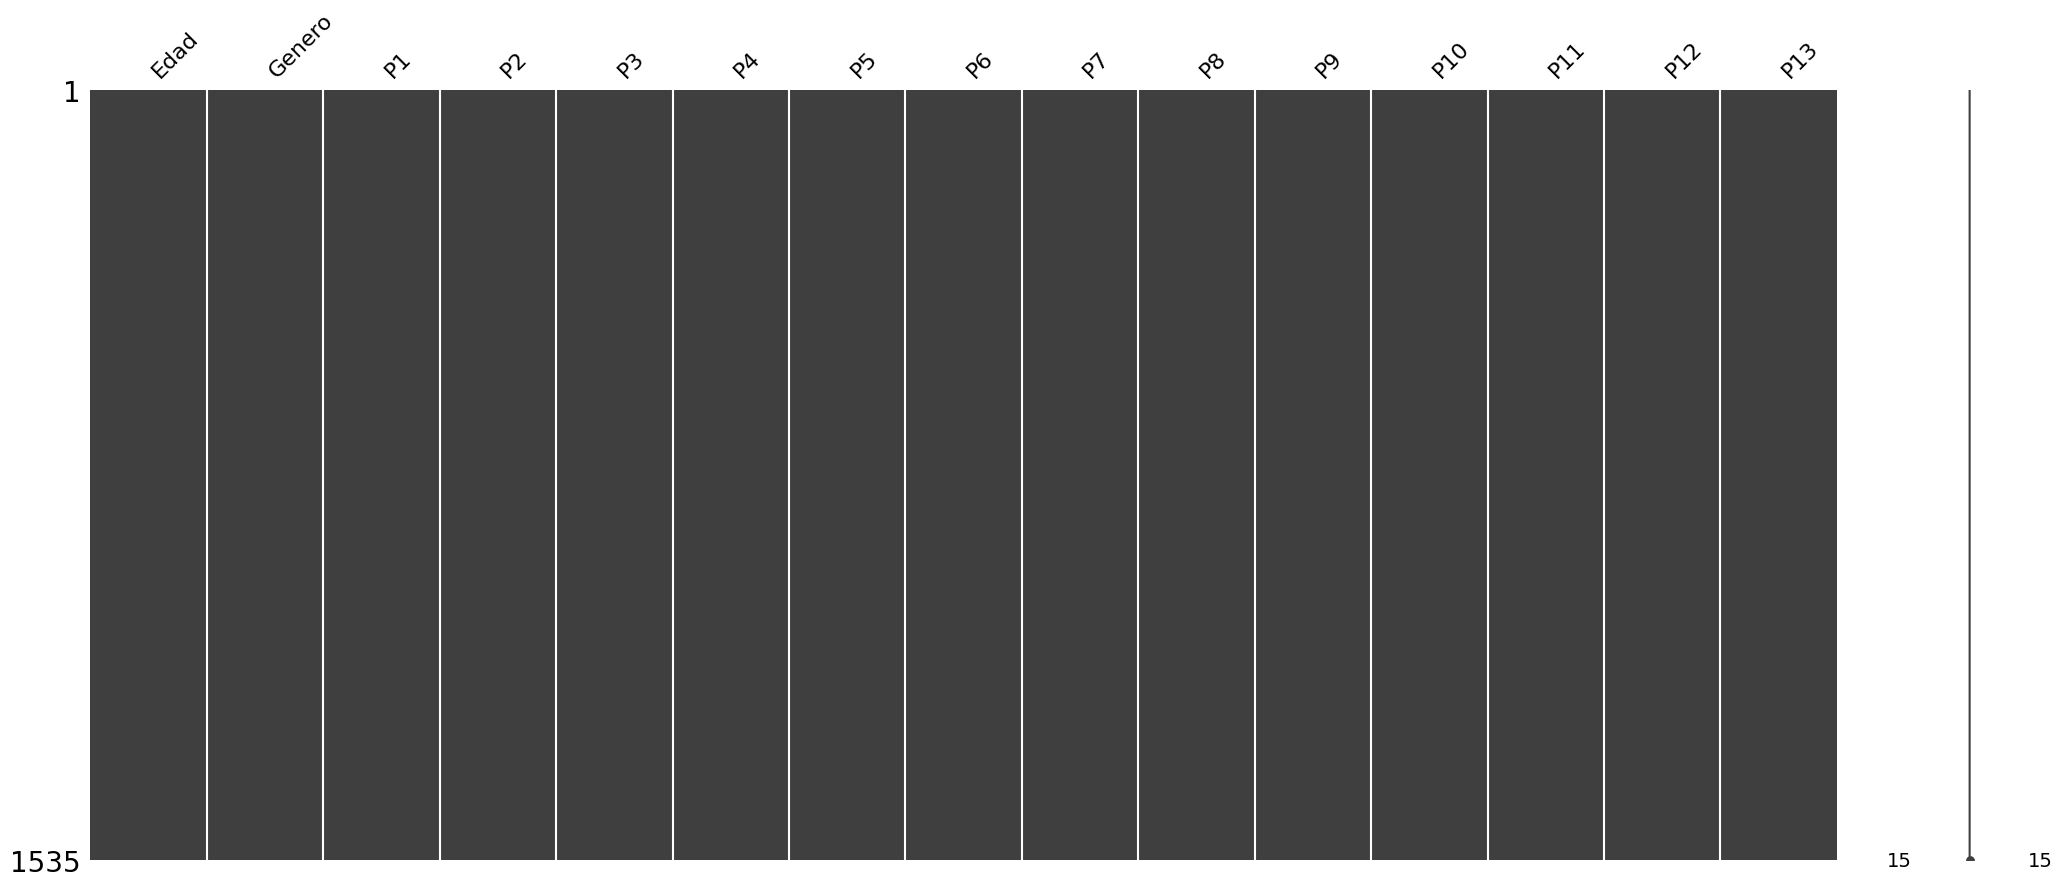

In [234]:
#Generamos el siguiente c√≥digo para comprobar que todos los datos est√°n completos y no hay valores ni filas vac√≠as

import missingno as msno
%matplotlib inline
msno.matrix(s_df)

‚úÖüôãüèΩ‚Äç‚ôÄÔ∏è Tal como podemos observar, nuestra encuesta **no tiene valores nulos**. Sin embargo, sabemos que pueden existir las t√≠picas respuestas de "**No sabe**" ‚ùì o "**No responde**" ‚ùå. Seg√∫n el Cuestionario que tenemos disponible, estas categor√≠as de respuesta fueron codificadas de la siguiente manera ü§ì:

* ‚ùì 888888: No sabe
* ‚ùå 988888: No responde

‚ùóPor lo general, estas **respuestas** suelen ser **marginales**, es decir, son tan pocas que no tomarlas en cuenta no implicar√≠an un cambio considerable. Esto no significa que, te√≥ricamente, no tengan un significado.
Por tal raz√≥n, para los fines de este an√°lisis, **hemos decidido imputarlas elimin√°ndolas del modelo** ‚õî. Para ellos, **convertiremos** los valores '888888' y '988888' de cada columna (pregunta) **en valores nulos**. Posteriormente utilizaremos el comando ***.dropna*** para quitarlas del modelo ‚úíÔ∏è.

In [235]:
#Transformamos los "No sabe" (888888) y los "No responde" (988888) en valores Nulos, para despu√©s eliminarlos

s_df['P1'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P2'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P3'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P4'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P5'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P6'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P7'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P8'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P9'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P10'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P11'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P12'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P13'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['Genero'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['Edad'].replace({888888.0: None, 988888.0: None}, inplace=True)


In [236]:
# Eliminar filas con valores NaN

s_df.dropna(inplace=True)
# Anteriormente, ten√≠amos 1535 filas. Despu√©s de este comando, pasaremos a tener 1414; es decir, fueron eliminadas 121 filas, lo que represent√≥ el 7.8% de las filas originales.
s_df.shape

(1414, 15)

‚úÖ‚úãüèΩ Ahora, aclaremos algunas cosas respecto a las respuestas a las preguntas. Estas respuestas son, en realidad, nuestros valores:

üó£Ô∏è Algunas preguntas est√°n planteadas para que el encuestado se ubique en una escala del 1 al 7, o del 1 al 10 üëÄ; otras son dicot√≥micas (S√≠ o No) ‚úåÔ∏è; y otras tienen respuestas concretas (como 'Mucho' o 'Poco') üò¨. Para estos √∫ltimos casos, y para evitar colocar esas respuestas concretas (palabras o frases), se opt√≥ por la codificaci√≥n de esas respuestas. La codificaci√≥n se hizo mediante n√∫meros.

ü§ó Hemos decicido no transformar los c√≥digos de estas respuestas de antemano porque para nuestro modelo de clusterizaci√≥n es necesario que tengamos valores num√©ricos. Por tal raz√≥n, cada vez que hagamos un gr√°fico o una tabla, haremos la correspondiente transformaci√≥n de valores üòâ.

üó£Ô∏è Pero lo s√≠ haremos ser√° un cambio en los c√≥digos con fines de simplificar las categor√≠as de respuesta. Veamos c√≥mo lo haremos:

* üëâ La escala del 1 al 7 de las preguntas P1, P2, P3 y P4, de grado de confianza y respeto en instituciones, ser√°n modificadas para tener solo tres c√≥digos. Los c√≥digos 1, 2 y 3 de la escala original ser√°n reemplazados por un (nuevo) c√≥digo, el 1, y significar√° "Baja confianza" o "Nada de respeto" seg√∫n corresponda. Los c√≥digos 4 y 5 de la escala original ser√°n reemplazados por un (nuevo) c√≥digo, el 2, y significar√° "Confianza media" o "Algo de respeto" seg√∫n corresponda. Y los c√≥digos 6 y 7 de la escala orginal ser√°n reemplazados por el c√≥digo 3, y significar√° "Alta confianza" o "Mucho respeto" seg√∫n corresponda ü§ì.

* üëâ La pregunta P7, de autoubicaci√≥n ideol√≥gica, sufrir√° un cambio parecido y solo tendr√° cinco c√≥digos. Los c√≥digos 1 y 2 de la escala original ser√°n reemplazados por el c√≥digo 1 y significar√° "Izquierda". Los c√≥digos 3 y 4 ser√°n reemplazados por el c√≥digo 2 y significar√° "Centro-izquierda". Los c√≥digos 5 y 6 ser√°n reemplazados por el c√≥digo 3 y significar√° "Centro". Los c√≥digos 7 y 8 ser√°n reemplazados por el c√≥digo 4 y significar√° "Centro-derecha". Los c√≥digos 9 y 10 ser√°n reemplazados por el c√≥digo 5 y significar√° "Derecha" üëÄ.

* üëâ La pregunta P19 tambi√©n ser√° modificada y pasar√° a tener solo tres c√≥digos. Los c√≥digos 1, 2 y 3 de la escala original ser√°n reemplazados por el c√≥digo 1 y significar√° "Nada orgulloso". Los c√≥digos 4 y 5 de la escala original ser√°n reemplazados por el c√≥digo 2 y significar√° "Medianamente orgulloso". Y los c√≥digos 6 y 7 de la escala original ser√°n reemplazados por el c√≥digo 1 y significar√° "Muy orgulloso" üíì.

* üëâ Finalmente, y con solo con el objetivo de reducir categor√≠as, las edades ser√°n presentadas por grupos etarios. Los grupos planteados ser√°n los siguientes:
  * 18 - 29 a√±os
  * 30 - 45 a√±os
  * 46 - 65 a√±os
  * 66 - 85 a√±os (nuestra muestra solo tiene casos hasta los 85 a√±os de edad, por eso no planteamos la categor√≠a residual "86 a√±os o m√°s") üßíüèΩ.


Teniendo esto, hagamos las modificaciones üõ†Ô∏è:

In [237]:
#Transformamos c√≥digos

s_df['P1'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['P2'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['P3'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['P4'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['P7'].replace({1:1,2:1,3:2,4:2,5:3,6:3,7:4,8:4,9:5,10:5}, inplace=True)
s_df['P13'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['Edad'].replace({18:'18-29', 19:'18-29', 20:'18-29', 21:'18-29', 22:'18-29', 23:'18-29', 24:'18-29', 25:'18-29', 26:'18-29', 27:'18-29', 28:'18-29', 29:'18-29', 30:'30-45', 31:'30-45', 32:'30-45', 33:'30-45', 34:'30-45', 35:'30-45', 36:'30-45', 37:'30-45',38:'30-45',39:'30-45',40:'30-45',41:'30-45',42:'30-45', 43:'30-45',44:'30-45',45:'30-45',46:'46-65',47:'46-65',48:'46-65',49:'46-65',50:'46-65',51:'46-65',52:'46-65',53:'46-65',54:'46-65',55:'46-65',56:'46-65', 57:'46-65',58:'46-65',59:'46-65',60:'46-65', 61:'46-65', 62:'46-65', 63:'46-65', 64:'46-65', 65:'46-65', 66:'66-85', 67:'66-85', 68:'66-85', 69:'66-85',70:'66-85', 71:'66-85',72:'66-85',73:'66-85', 74:'66-85',75:'66-85',76:'66-85',77:'66-85',78:'66-85',79:'66-85',80:'66-85',81:'66-85',82:'66-85',83:'66-85',84:'66-85', 85: '66-85'}, inplace=True)

s_df.head()

#1101:1, 1102:2, 1103:3, 1104:4, 1105:5, 1106:6, 1107:7, 1108:8, 1109:9, 1110:10, 1111:11, 1112:12, 1113:13, 1114:14, 1115:15,

Edad Genero   P1   P2   P3   P4   P5   P6   P7   P8   P9  P10  P11  P12  \
0  46-65    2.0  1.0  1.0  1.0  1.0  4.0  2.0  1.0  3.0  2.0  3.0  1.0  3.0   
1  18-29    2.0  1.0  1.0  1.0  2.0  2.0  2.0  3.0  3.0  2.0  3.0  2.0  2.0   
2  46-65    2.0  3.0  1.0  1.0  2.0  4.0  2.0  4.0  3.0  1.0  4.0  2.0  6.0   
3  30-45    2.0  2.0  1.0  1.0  1.0  2.0  2.0  3.0  3.0  1.0  2.0  1.0  1.0   
4  66-85    1.0  3.0  2.0  2.0  1.0  1.0  1.0  5.0  2.0  1.0  3.0  2.0  6.0   

   P13  
0  1.0  
1  1.0  
2  3.0  
3  2.0  
4  3.0

In [238]:
# Por √∫ltimo, y para que el conteo sea m√°s pr√°ctico, estableceremos una columna √≠ndice
#Con el siguiente c√≥digo, si bien es cierto, agregamos una columna √≠nidce, esta se encuetra pegada al dataframe original que ten√≠a 1535 filas
data = s_df.reset_index()
data = data.drop ('index', axis = 1) #Eliminamos la columna √≠ndice pegada al dataframe original

datos = data.reset_index() #Generamos un nuevo √≠ndice y veremos que el √∫ltimo valor tiene el c√≥digo 1319 y no 1534 como en el original

datos = datos.rename(columns={'index': 'Indice'}) #renombramos el nombre de la columna

datos.head()  #n√≥tese que hemos cambiado el nombre de nuestro Dataframe. Ahora se llama 'datos'

Indice   Edad Genero   P1   P2   P3   P4   P5   P6   P7   P8   P9  P10  \
0       0  46-65    2.0  1.0  1.0  1.0  1.0  4.0  2.0  1.0  3.0  2.0  3.0   
1       1  18-29    2.0  1.0  1.0  1.0  2.0  2.0  2.0  3.0  3.0  2.0  3.0   
2       2  46-65    2.0  3.0  1.0  1.0  2.0  4.0  2.0  4.0  3.0  1.0  4.0   
3       3  30-45    2.0  2.0  1.0  1.0  1.0  2.0  2.0  3.0  3.0  1.0  2.0   
4       4  66-85    1.0  3.0  2.0  2.0  1.0  1.0  1.0  5.0  2.0  1.0  3.0   

   P11  P12  P13  
0  1.0  3.0  1.0  
1  2.0  2.0  1.0  
2  2.0  6.0  3.0  
3  1.0  1.0  2.0  
4  2.0  6.0  3.0

# Edades y G√©nero üë®üë©‚Äçü¶±

üîç‚úÖ Con todo esto listo, ya podemos comenzar a analizar nuestros datos.

Antes de empezar con lo que pretendemos: analizar el grupo de j√≥venes, veamos la distribuci√≥n de nuestra muestra total por edad üë©‚Äçüë©‚Äçüëß‚Äçüë¶.

In [239]:
# Ahora armamos un tabla que nos servir√° para visualizar nuestro primer gr√°fico

datos_edad = datos[['Edad','Indice']].groupby(by=['Edad']).count().reset_index()
Porcentaje = datos_edad.Indice * 100/1414
Porcentaje = Porcentaje.round(2)
datos_edad['Porcentaje'] = Porcentaje

#Hacemos algo parecido, pero con el g√©nero
datos_genero = datos[['Genero','Indice']].groupby(by=['Genero']).count().reset_index()
datos_genero['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje_g = datos_genero.Indice * 100/1320
Porcentaje_g = Porcentaje_g.round(2)
datos_genero['Porcentaje'] = Porcentaje_g


In [240]:
from bokeh.palettes import Spectral6 # Importamos la paleta de colores Spectral6 de Bokeh
from bokeh.palettes import Blues8  # Importamos la paleta de colores Blues8 de Bokeh
from bokeh.models import HoverTool  # Importamos la herramienta HoverTool de Bokeh
from bokeh.io import show, output_notebook  # Importamos funciones de Bokeh para visualizaci√≥n interactiva
from bokeh.embed import file_html  # Importamos la funci√≥n file_html de Bokeh para exportar el gr√°fico a HTML
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange  # Importamos clases y funciones de Bokeh para manejo de datos
from bokeh.plotting import figure, output_file  # Importamos clases y funciones de Bokeh para crear gr√°ficos

output_notebook()  # Habilitamos la salida de Bokeh en el cuaderno de Jupyter

In [241]:
# Posteriormente, generamos el gr√°fico

source = ColumnDataSource(data=dict(Edad=datos_edad.Edad.astype(str), Porcentaje = datos_edad.Porcentaje.astype(str), conteo=datos_edad.Indice , color=Blues8[:4]))
p = figure(x_range=datos_edad.Edad.astype(str), title="GR√ÅFICO 1: Distribuci√≥n de frecuencias absolutas y relativas por grupo etario")
p.vbar(x='Edad',top='conteo', width=0.9, color='color', legend_field="Edad", source=source)
p.xaxis.axis_label = "Grupo etario"
p.yaxis.axis_label = "Frecuencia"
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Grupo etario", "@Edad")]
p.add_tools(hover)
# Mostramos el gr√°fico de edades
show(p)

In [242]:
#Hacemos un grafico, pero ahora con genero

source = ColumnDataSource(data=dict(Genero=datos_genero.Genero.astype(str), Porcentaje = datos_genero.Porcentaje.astype(str), conteo=datos_genero.Indice, color=Spectral6[:2]))
p1 = figure(x_range=datos_genero.Genero.astype(str), title="GR√ÅFICO 2: Distribuci√≥n de frecuencias absolutas y relativas por g√©nero. LAPOP Per√∫ 2023")
p1.vbar(x='Genero',top='conteo', width=0.9, color='color', legend_field="Genero", source=source)
p1.xaxis.axis_label = "G√©nero"
p1.yaxis.axis_label = "Frecuencia"
p1.legend.orientation = "horizontal"
p1.legend.location = "top_center"

hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("G√©nero", "@Genero")]
p1.add_tools(hover)
# Mostramos el gr√°fico de edades
show(p1)

‚úÖüôãüèΩ‚Äç‚ôÄÔ∏è Lo que podemos observar en el **GR√ÅFICO 1** es la distribuci√≥n de **frecuencias absolutas y relativas de nuestra muestra** repecto del **grupo etario**. El grupo etario de 18 a 29 a√±os, a quienes consideramos j√≥venes, estuvo conformado por 484 personas, lo que representa un 34.23% de la muestra. El grupo de 30 a 45, a quienes consideramos adultos j√≥venes, a√±os estuvo compuesto por 524 personas, lo que represent√≥ el 37.13%; este grupo es el m√°s grande dentro de nuestra muestra. El siguiente grupo es el de adultos en rango etario de 46 a 65 a√±os. Este es un grupo m√°s peque√±o, compuesto de 324 personas, lo que represent√≥ un 22.91% de nuestra muestra. Finalmente, el grupo de adultos mayores de 66 a 85 a√±os es el m√°s peque√±o y estuvo conformado por 81 personas, lo que representa el 5.73% de la muestra.


‚úÖüôãüèΩ‚Äç‚ôÇÔ∏è Por otro lado, el **GR√ÅFICO 2** muestra la **distribuci√≥n de frecuencias absolutas y relativas** de nuestra muestra respecto del **g√©nero**. Fueron m√°s las personas que se identificaron con el g√©nero masculino: un total de 681 personas, lo que represent√≥ el 51.59% de la muestra. Por su parte, fueron 639 las personas que se identificaron con el g√©nero femenino, un 48.41% de la muestra. Tal como podemos corroborar en el GR√ÅFICO 2, dentro de nuestra selecci√≥n de datos (recordemos que imputamos los 'No sabe' y 'No responde'), no hubo personas que se identificaron con alg√∫n g√©nero diferente a 'hombre' o 'mujer'.

ü§î ¬øPero cu√°l ser√° la distribuci√≥n de g√©nero por grupo etario? Para ver ello haremos dos tablas bivariadas.

In [244]:
#Primero creamos un tabla com√∫n en la que diferenciaremos los valores por grupo etario y por g√©nero
datos_edgen = datos[['Edad','Genero','Indice']].groupby(by=['Edad','Genero']).count().reset_index()
datos_edgen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creaci√≥n de la segunda tabla, que tendr√° los valores relativos de los grupos etarios. Los valores relativos ser√°n calculados por g√©nero (es decir, los totales quedar√°n en las filas), estos nos ayudar√° a la comparaci√≥n
tabla_porcentajes = pd.pivot_table(datos_edgen, values='Indice', index='Genero', columns='Edad')
# Agregar los porcentajes
tabla_porcentajes = tabla_porcentajes.apply(lambda x: x / x.sum() * 100, axis=0)
# Agregar una columna de totales
tabla_porcentajes.loc['TOTAL'] = tabla_porcentajes.sum(axis=0)
tabla_porcentajes = tabla_porcentajes.applymap(lambda x: f'{x:.2f}%')

print('TABLA 1: FRECUENCIAS RELATIVAS - GRUPO ETARIO POR G√âNERO')
tabla_porcentajes.style.set_table_styles([
    dict(selector="caption", props=[("text-align", "center")]),
    dict(selector="th", props=[("background-color", "#3B84D3"), ("color", "white")]),
    dict(selector="td", props=[("text-align", "center")])
])


TABLA 1: FRECUENCIAS RELATIVAS - GRUPO ETARIO POR G√âNERO


ü§ì Tal como podemos observar en la **TABLA 2**, los hombres son el g√©nero mayoritario en cada rango etario, a excepci√≥n del rango de 46 a 65 a√±os, donde las mujeres son mayor√≠a por una peque√±a diferencia. La brecha m√°s amplia la tenemos en el grupo etario de 66 a 85 a√±os: es una diferencia de casi veinte puntos entre hombres y mujeres üòÆ.

# Los j√≥venes

üîç Tal como est√°n planteadas nuestras preguntas y nuestras hip√≥tesis, debemos hacer un an√°lisis m√°s profudo de lo ocurrido en lo j√≥venes (grupo etario de 18 a 29 a√±os). Es en ellos donde evaluaremos nuestras preguntas de la encuesta y, principalmente, ver si se corroboran o no nuestras hip√≥tesis.

ü§î ¬øPor qu√© los j√≥venes? No solo porque son el segundo grupo m√°s grande dentro de nuestra muestra, sino tambi√©n porque es de nuestro inter√©s describir la distribuci√≥n de las categor√≠as de nuestras variables en un grupo que sin lugar a duda tomar√° el lugar de los adultos de hoy: son de alg√∫n modo, el futuro del pa√≠s üòé.


In [ ]:
#Para empezar a trabajar con los j√≥venes, filtratemos la categor√≠a '18-29' de la columna 'Edad y generaremos un nuevo datarfame
jovenes = datos[datos['Edad'] == '18-29']
jovenes.head()

Indice   Edad Genero   P1   P2   P3   P4   P5   P6   P7   P8   P9  P10  \
1        1  18-29    2.0  1.0  1.0  1.0  2.0  2.0  2.0  3.0  3.0  2.0  3.0   
5        5  18-29    1.0  2.0  1.0  1.0  1.0  3.0  2.0  3.0  1.0  1.0  4.0   
6        6  18-29    1.0  2.0  1.0  1.0  1.0  3.0  2.0  2.0  2.0  1.0  3.0   
11      11  18-29    2.0  3.0  1.0  1.0  1.0  2.0  2.0  2.0  3.0  2.0  3.0   
12      12  18-29    1.0  1.0  1.0  1.0  1.0  2.0  1.0  5.0  3.0  2.0  4.0   

    P11  P12  P13  
1   2.0  2.0  1.0  
5   1.0  2.0  2.0  
6   3.0  1.0  2.0  
11  2.0  1.0  2.0  
12  2.0  4.0  1.0

# Los j√≥venes y las instituciones: nuestra primera hip√≥tesis

üî¶ Para analizar la confianza que tienen los j√≥venes peruanos en las instituciones peruanas, debemos poner el foco en las preguntas P1, P2, P3 y P4. Para el caso de la pregunta P1, en realidad pregunta por el respeto que tiene por las instituciones pol√≠ticas del Per√∫. Por otro lado, las preguntas P2, P3 y P4 preguntan por el punto de confianza en el Congreso, partidos pol√≠ticos y la presidenta, respectivamente.

‚úçÔ∏è Estas cuatro preguntas ten√≠an como respuesta una escala del 1 al 7 en la que 1 era Nada y 7 era Mucho, pero recordemos que l√≠neas m√°s arriba transformamos esta escala para que tenga tres valores: 1, 2 y 3.

üó£Ô∏èüëâ Empecemos con la pregunta **P1: ¬øHasta qu√© punto tiene usted respeto por las instituciones pol√≠ticas de Per√∫?**

In [ ]:
#Hacemos una tabla
jp1 = jovenes[['P1','Indice']].groupby(by=['P1']).count().reset_index()
jp1['P1'].replace({1: 'Nada de respeto', 2: 'Algo de respeto', 3: 'Mucho respeto'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp1.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp1['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico

source = ColumnDataSource(data=dict(P1=jp1.P1.astype(str), Porcentaje = jp1.Porcentaje.astype(str), conteo=jp1.Indice , color=Spectral6[:3]))
p = figure(x_range=jp1.P1.astype(str), title="GR√ÅFICO 3: El respeto por las instituciones pol√≠ticas en j√≥venes")
p.vbar(x='P1',top='conteo', width=0.9, color='color', legend_field="P1", source=source)
p.xaxis.axis_label = "Nivel de respeto"
p.yaxis.axis_label = "Frecuencia"
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P1")]
p.add_tools(hover)
# Mostramos el gr√°fico de edades
show(p)

ü§ì Tal como podemos observar en el **GR√ÅFICO 3**, el 30.37% de los j√≥venes pueden ser ubicados en la categor√≠a "Nada de respeto" por las instituciones pol√≠ticas del Per√∫. Por otro lado, podemos decir que el 42.77% de los j√≥venes peruanos tienen "Algo de respeto" por las instituciones pol√≠ticas del Per√∫: este grupo constituir√≠a el grupo mayoritario. Finalmente, el 26.86% de los j√≥venes podr√≠a ser ubicado en "Mucho respeto". Aunque es un porcentaje considerable, son el menor grupo dentro de los j√≥venes.

ü§î ¬øHabr√° alguna diferencia entre g√©neros? Para analizar ello, veamos una tabla de bivariada de frecuencias relativas

In [246]:
jp1_gen = jovenes[['Genero','P1','Indice']].groupby(by=['P1','Genero']).count().reset_index()
jp1_gen['P1'].replace({1: 'Nada de respeto', 2: 'Algo de respeto', 3: 'Mucho respeto'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
jp1_gen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creaci√≥n de la segunda tabla, que tendr√° los valores relativos
jp1_gen_porcentaje = pd.pivot_table(jp1_gen, values='Indice', index='Genero', columns='P1')
# Agregar los porcentajes
jp1_gen_porcentaje = jp1_gen_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp1_gen_porcentaje['TOTAL'] = jp1_gen_porcentaje.sum(axis=1)
jp1_gen_porcentaje = jp1_gen_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp1_gen_porcentaje = jp1_gen_porcentaje.reindex(index=['Hombre', 'Mujer'])
jp1_gen_porcentaje = jp1_gen_porcentaje[['Nada de respeto','Algo de respeto','Mucho respeto','TOTAL']]

print('TABLA 2: EL RESPETO DE PARTE DE LOS J√ìVENES HACIA LAS INSTITUCIONES SEG√öN G√âNERO (VALORES RELATIVOS)')
jp1_gen_porcentaje

TABLA 2: EL RESPETO DE PARTE DE LOS J√ìVENES HACIA LAS INSTITUCIONES SEG√öN G√âNERO (VALORES RELATIVOS)


P1     Nada de respeto Algo de respeto Mucho respeto    TOTAL
Genero                                                       
Hombre          33.33%          38.62%        28.05%  100.00%
Mujer           27.31%          47.06%        25.63%  100.00%

ü§ìüëâ Teniendo los datos de la **TABLA 1**, podemos empezar a comparar. Del total de hombres j√≥venes, el 33.33% se podr√≠a ubicar en la categor√≠a "Nada de respeto" por las instituciones pol√≠ticas del Per√∫, mientras que el 27.31% de las mujeres j√≥venes se podr√≠a ubicar en esta categor√≠a. Por otro lado, el 38.62% de los hombres j√≥venes, y el 47.06% de las muejeres j√≥venes, pueden ser encajados en la categor√≠a "Algo de respeto". Finalmente, el 28.05% de hombres j√≥venes estar√≠a en la categor√≠a de "Mucho respeto", y un 25.63% de las muejeres j√≥venes.

‚ùåüëâ Con estos datos, **no podemos decir que el g√©nero sea una variable de influencia significativa en el respeto que sienten los j√≥venes por las instituciones pol√≠ticas** del Per√∫. Es decir, **ambos g√©neros** tienen un bajo nivel de respeto por las instituciones, **niveles similares**. Esto **se condice con nuestra primera hip√≥tesis**: *Las personas, tanto de g√©nero masculino como femenino, en un rango etario de 18 a 29 a√±os tienen niveles parecidos de confianza en las instituciones*

‚úÖ Por otro lado, ambos g√©neros se ubican mayormente en la categor√≠a "Algo de respeto" que representa los valores 4 y 5 de la escala original del 1 al 7.

üëâüßê Veamos ahora el nivel de confianza que tienen los j√≥venes en tres instituciones pol√≠ticas del Per√∫: el Congreso, los partidos pol√≠ticos (principales actores de una democracia), y la presidenta.

ü§î ¬øA qu√© instituci√≥n tendr√°n m√°s confianza los j√≥venes? Para ello analizaremos las preguntas P2, P3 y P4.

In [ ]:
#Generaremos en este c√≥digo, lo necesario para nuestros datos de la P2, P3 y P4

#Hacemos primero un tabla, esta vez, con los datos de la P2 que preguntaba por la confianza en el Congreso
jp2 = jovenes[['P2','Indice']].groupby(by=['P2']).count().reset_index()
jp2['P2'].replace({1: 'Confianza baja', 2: 'Confianza media', 3: 'Confianza alta'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp2.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp2['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P2
source = ColumnDataSource(data=dict(P2=jp2.P2.astype(str), Porcentaje = jp2.Porcentaje.astype(str), conteo=jp2.Indice , color=Spectral6[:3]))
p_p2 = figure(x_range=jp2.P2.astype(str), title="GR√ÅFICO 4: Nivel de confianza que adjudican los j√≥venes al Congreso")
p_p2.vbar(x='P2',top='conteo', width=0.9, color='color', legend_field="P2", source=source)
p_p2.xaxis.axis_label = "Nivel de respeto"
p_p2.yaxis.axis_label = "Frecuencia"
p_p2.legend.orientation = "horizontal"
p_p2.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P2")]
p_p2.add_tools(hover)

# Ahora, haremos una tabla pero con los datos de la columna P3 que preguntaba por la confianza en los partidos pol√≠ticos
jp3 = jovenes[['P3','Indice']].groupby(by=['P3']).count().reset_index()
jp3['P3'].replace({1: 'Confianza baja', 2: 'Confianza media', 3: 'Confianza alta'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp3.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp3['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P3
source = ColumnDataSource(data=dict(P3=jp3.P3.astype(str), Porcentaje = jp3.Porcentaje.astype(str), conteo=jp3.Indice , color=Spectral6[:3]))
p_p3 = figure(x_range=jp3.P3.astype(str), title="GR√ÅFICO 5: Nivel de confianza que adjudican los j√≥venes a los partidos pol√≠ticos")
p_p3.vbar(x='P3',top='conteo', width=0.9, color='color', legend_field="P3", source=source)
p_p3.xaxis.axis_label = "Nivel de respeto"
p_p3.yaxis.axis_label = "Frecuencia"
p_p3.legend.orientation = "horizontal"
p_p3.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P3")]
p_p3.add_tools(hover)

# Finalmente, haremos una tabla para la pregunta P4, que pregunta por la confianza en la presidenta Dina Boluarte
jp4 = jovenes[['P4','Indice']].groupby(by=['P4']).count().reset_index()
jp4['P4'].replace({1: 'Confianza baja', 2: 'Confianza media', 3: 'Confianza alta'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp4.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp4['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P4
source = ColumnDataSource(data=dict(P4=jp4.P4.astype(str), Porcentaje = jp4.Porcentaje.astype(str), conteo=jp4.Indice , color=Spectral6[:3]))
p_p4 = figure(x_range=jp4.P4.astype(str), title="GR√ÅFICO 6: Nivel de confianza que adjudican los j√≥venes a la presidenta Dina Boluarte")
p_p4.vbar(x='P4',top='conteo', width=0.9, color='color', legend_field="P4", source=source)
p_p4.xaxis.axis_label = "Nivel de respeto"
p_p4.yaxis.axis_label = "Frecuencia"
p_p4.legend.orientation = "horizontal"
p_p4.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P4")]
p_p4.add_tools(hover)

In [247]:
# Mostramos el gr√°fico de Congreso
show(p_p2)

In [248]:
# Mostramos el gr√°fico de partidos pol√≠ticos
show(p_p3)

In [249]:
# Mostramos el gr√°fico de la presidenta
show(p_p4)

ü§∑üèΩ‚Äç‚ôÇÔ∏è Lo que se desprende de los tres graficos anteriores, a simple vista, es que **no son consideradas instituciones dignas de respeto de parte de los j√≥venes** peruanos (de 18 a 29 a√±os de edad). Pero aunque todas son vinculadas al nivel "Nada de respeto", **¬øcu√°l se lleva el primer lugar? Veamos un breve comparaci√≥n** ü§î.

Tal como podemos obsevar en el **GR√ÅFICO 4**, que representa la **distribuci√≥n de frencuecias en el nivel de confianza en el Congreso**, y cuya pregunta original fue "¬øHasta qu√© punto tiene confianza en el Congreso?", podemos decir que un 76.69% de los j√≥venes peruanos adjudican un nivel de confianza bajo al Congreso. un 19.63% de los j√≥venes tiene un nivel de confianza medio. Y un 2.69% tiene un nivel de confianza alto en el Congreso.

Por su parte, el **GR√ÅFICO 5** representa representa la **distribuci√≥n de frencuecias en el nivel de confianza en los partidos pol√≠ticos**. La pregunta original fue "¬øHasta qu√© punto tiene confianza en los partidos pol√≠ticos?". Ac√° nuevamente la mayor√≠a de j√≥venes tiene un nivel de confianza bajo en esta instituci√≥n: 78.93% del total. Los que tiene un nivel de confianza medio son el 18.18%, y solo el 2.27% de los j√≥venes tiene un nivel de confianza alto en los partidos pol√≠ticos.

Finalmente, el **GR√ÅFICO 6** muestra el nivel de **confianza que transmite la presidenta Dina Boluarte en los j√≥venes**. La pregunta original fue "¬øHasta qu√© punto tiene confianza en la presidenta?". Dina Boluarte re√∫ne el nivel de confianza bajo m√°s elevado hasta el momento con el 80.58%. Un 15.5% tiene un nivel de confianza medio en la presidenta, y un 3.93% le adjudica un nivel de confianza alto.

üôçüèΩ‚Äç‚ôÄÔ∏è Con esto, podemos decir que, aunque las tres instituciones est√°n vinculadas a la "Baja confianza", **la presidenta es en la que menos conf√≠an los j√≥venes**.

# Los j√≥venes y su inter√©s por la pol√≠tica. Nuestra segunda hip√≥tesis

‚úÖüó£Ô∏è Para describir esta secci√≥n, debemos analizar las **respuestas a la pregunta P5**: *¬øQu√© tanto inter√©s tiene usted en la pol√≠tica: mucho, algo, poco o nada?* ¬øC√≥mo respondieron los j√≥venes? ¬øEl g√©nero es una variable que influye en el inter√©s que tienen los j√≥venes por la pol√≠tica? Hagamos zoom y demos una respuesta a la que fue nuestra primera pregunta de investigaci√≥n.

In [ ]:
#Comenzando a hacer un gr√°fico con la pregunta P5

#Hacemos primero un tabla, esta vez, con los datos de la P5 que preguntaba por el inter√©s en la pol√≠tica
jp5 = jovenes[['P5','Indice']].groupby(by=['P5']).count().reset_index()
jp5['P5'].replace({1: 'Mucho', 2: 'Algo', 3: 'Poco', 4: 'Nada'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp5.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp5['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P2
source = ColumnDataSource(data=dict(P5=jp5.P5.astype(str), Porcentaje = jp5.Porcentaje.astype(str), conteo=jp5.Indice , color=Spectral6[:4]))
p_p5 = figure(x_range=jp5.P5.astype(str), title="GR√ÅFICO 7: El inter√©s por la pol√≠tica en los j√≥venes")
p_p5.vbar(x='P5',top='conteo', width=0.9, color='color', legend_field="P5", source=source)
p_p5.xaxis.axis_label = "Inter√©s por la pol√≠tica"
p_p5.yaxis.axis_label = "Frecuencia"
p_p5.legend.orientation = "horizontal"
p_p5.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P5")]
p_p5.add_tools(hover)

# Mostramos el gr√°fico
show(p_p5)

In [ ]:
jp5_gen = jovenes[['Genero','P5','Indice']].groupby(by=['P5','Genero']).count().reset_index()
jp5_gen['P5'].replace({1: 'Mucho', 2: 'Algo', 3: 'Poco', 4: 'Nada'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
jp5_gen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creaci√≥n de la segunda tabla, que tendr√° los valores relativos
jp5_gen_porcentaje = pd.pivot_table(jp5_gen, values='Indice', index='Genero', columns='P5')
# Agregar los porcentajes
jp5_gen_porcentaje = jp5_gen_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp5_gen_porcentaje['TOTAL'] = jp5_gen_porcentaje.sum(axis=1)
jp5_gen_porcentaje = jp5_gen_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp5_gen_porcentaje = jp5_gen_porcentaje.reindex(index=['Hombre', 'Mujer'])
jp5_gen_porcentaje = jp5_gen_porcentaje[['Mucho','Algo','Poco','Nada', 'TOTAL']]

In [250]:
print('TABLA 3: EL INTER√âS POR LA POL√çTICA EN LOS J√ìVENES PERUANOS (VALORES RELATIVOS)')
jp5_gen_porcentaje

TABLA 3: EL INTER√âS POR LA POL√çTICA EN LOS J√ìVENES PERUANOS (VALORES RELATIVOS)


P5       Mucho    Algo    Poco    Nada    TOTAL
Genero                                         
Hombre  13.01%  40.65%  29.27%  17.07%  100.00%
Mujer   12.61%  31.51%  34.87%  21.01%  100.00%

‚úÖüó£Ô∏è Siguiendo lo observado en el **GR√ÅFICO 7**, la gran **mayor√≠a de j√≥venes** manifiesta tener **"Algo" y "Poco" inter√©s por la pol√≠tica**. Veamos un poco m√°s a fondo este gr√°fico. Los j√≥venes que manifiestan tener mucho inter√©s por la pol√≠tica son el menor grupo, representan un 12.81%. Los j√≥venes que tiene "Algo" de inter√©s por la pol√≠tica son la mayor√≠a: un 36.16% del total. A estos le sigen los que dicen tener "Poco" inter√©s en la pol√≠tica, y que son el 32.02% de los j√≥venes. Finalmente, los tiene "Nada" de inter√©s en la pol√≠tica son un 19.01%.

üôãüèΩ‚Äç‚ôÇÔ∏èüôçüèΩ‚Äç‚ôÄÔ∏è Y, para ver sin tenemos alguna influencia del **g√©nero** en la respuesta de los j√≥venes, realizamos la **TABLA 3**. Ah√≠ podemos observar que **la distribuci√≥n de hombres y mujeres en las categor√≠as de la pregunta es relativamente parecida**: los un 13.01% de los hombres manifiesta tener mucho inter√©s en la pol√≠tica, y hacen lo propio un 12.61% de las mujeres. Un 40.65% de los hombres dice tener "Algo" de inter√©s en la pol√≠tica, mientras que el 31.51% se ubic√≥ en esta categor√≠a: solo aqu√≠ notamos una diferencia llamativa de casi el 10%. Luego, tenemos al 29.27% de los hombres que tiene "Poco" inter√©s en la pol√≠tica, y al 34.87% de las mujeres que tambi√©n se ubican aqu√≠. Finalmente, un 17.07% de los hombres tiene "Nada" de inter√©s en la pol√≠tica, mientras que manifiestan lo misno un 21.01% de las mujeres.

‚úÖüó£Ô∏è Teniendo estos datos del cruce entre la variable G√©nero y las categor√≠as de respuesta a la pregunta P5, podemos decir que el g√©nero no tiene una influencia notoria en la respuesta a esta pregunta, por lo que **nuestra hip√≥tesis** (H1: En un rango etario de 18 a 29 a√±os, **no** se perciben **diferencias** relevantes en el inter√©s por la pol√≠tica seg√∫n el **g√©nero**) **quedar√≠a corroborada**.

# Izquierdas y derechas: la autoubicaci√≥n ideol√≥gica de los j√≥venes

üë• Habiendo respondido nuestras dos preguntas y habiendo corroborado nuestras hip√≥tesos, podemos seguir describiendo otras preguntas. Empecemos por la autoubicaci√≥n ideol√≥gica. Se les pidi√≥ a las personas que se ubicaran en una escala del 1 al diez, donde 1 es Izquiera y 10 es Derecha. Para darle un poco m√°s de sentido a la escala, decidimos replantear las categor√≠as, tal como propusimos l√≠enas arriba.


In [ ]:
#Hacemos primero un tabla, esta vez, con los datos de la P7 que preguntaba por la autoubicaci√≥n ideol√≥gica
jp7 = jovenes[['P7','Indice']].groupby(by=['P7']).count().reset_index()
jp7['P7'].replace({1: 'Izquierda', 2: 'Centroizquierda', 3: 'Centro', 4: 'Centroderecha', 5: 'Derecha'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp7.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp7['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P2
source = ColumnDataSource(data=dict(P7=jp7.P7.astype(str), Porcentaje = jp7.Porcentaje.astype(str), conteo=jp7.Indice , color=Spectral6[:5]))
p_p7 = figure(x_range=jp7.P7.astype(str), title="GR√ÅFICO 8: Autoubicaci√≥n ideol√≥gica en los j√≥venes")
p_p7.vbar(x='P7',top='conteo', width=0.9, color='color', legend_field="P7", source=source)
p_p7.xaxis.axis_label = "Ubicaci√≥n en el espectro ideol√≥gico"
p_p7.yaxis.axis_label = "Frecuencia"
p_p7.legend.orientation = "horizontal"
p_p7.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P7")]
p_p7.add_tools(hover)

# Mostramos el gr√°fico
show(p_p7)

üëâ‚úÖ Tras visualizar los datos, podemos ver casi una distribuci√≥n normal de los j√≥venes en el espectro ideol√≥gico. A la izquierda tenemos un 10.95% de los j√≥venes, y en la centroizquierda al 21.49% de ellos. En el centro tenemos a la mayor cantidad de j√≥venes: un 39.46%. Un 17.56% se ubica en la centroderecha y un 10.54 se ubica a la derecha. Si planteamos un sistema de tres categor√≠as en el espectro ideol√≥gico, podr√≠amos decir que un 32.44 de los j√≥venes peruanos se encuentra la izquierda; un 39.46% en el centro; y un 28.1% a la derecha.

ü§î Y en este punto **podemos hacernos la pregunta de si el g√©nero tiene alguna indeicencia en la autoubicaci√≥n ideol√≥gica** en los j√≥venes. Para ver ello, dise√±emos una nueva tabla bivariada.

In [251]:
jp7_gen = jovenes[['Genero','P7','Indice']].groupby(by=['P7','Genero']).count().reset_index()
jp7_gen['P7'].replace({1: 'Izquierda', 2: 'Centroizquierda', 3: 'Centro', 4: 'Centroderecha', 5: 'Derecha'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
jp7_gen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creaci√≥n de la segunda tabla, que tendr√° los valores relativos
jp7_gen_porcentaje = pd.pivot_table(jp7_gen, values='Indice', index='Genero', columns='P7')
# Agregar los porcentajes
jp7_gen_porcentaje = jp7_gen_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp7_gen_porcentaje['TOTAL'] = jp7_gen_porcentaje.sum(axis=1)
jp7_gen_porcentaje = jp7_gen_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp7_gen_porcentaje = jp7_gen_porcentaje.reindex(index=['Hombre', 'Mujer'])
jp7_gen_porcentaje = jp7_gen_porcentaje[['Izquierda','Centroizquierda','Centro','Centroderecha','Derecha','TOTAL']]

print('TABLA 4: AUTOUBICACI√ìN IDEOL√ìGICA EN J√ìVENES SEG√öN G√âNERO (VALORES RELATIVOS)')
jp7_gen_porcentaje

TABLA 4: AUTOUBICACI√ìN IDEOL√ìGICA EN J√ìVENES SEG√öN G√âNERO (VALORES RELATIVOS)


P7     Izquierda Centroizquierda  Centro Centroderecha Derecha    TOTAL
Genero                                                                 
Hombre     9.35%          16.67%  40.65%        20.73%  12.60%  100.00%
Mujer     12.61%          26.47%  38.24%        14.29%   8.40%  100.00%

ü§ì Teniendo en cuenta los datos de la **TABLA 4**, ya podemos empezar a comprar. En principio, un 9.35% de los hombres j√≥venes se ubica a la izquierda, mientras que se ubican en el mismo lugar el 12.61% de las mujeres. A la centroizquiera se ubican el 16.67% de los hombres, y un 26.47% de las mujeres. En el centro tenemos porcentajes relativamente parecidos: aqu√≠ se ubican el 40.65% de los hombres, y el 38.24% de las mujeres. Por otro lado, en la centroderecha tenemos al 20.73% de los varones, y el 14.29% de las mujeres. Finalmente, a la derecha ubicamos al 12.6% de los hombres y al 8.4% de las mujeres.

ü´Ä Con lo observado podemos decir que,**por lo menos en forma ligeramente notoria, las mujeres se suelen ubicar a la izquierda del espectro**. Aunque no podemos deducir de esto que el g√©nero sea una variable de mucha influencia en la ubicaci√≥n ideol√≥gica.

‚úÖ** Si planteamos un sistema de tres categor√≠as**, podr√≠amos decir que un 26.02% de los hombres se ubica a la izquierda, mientras que hacen lo mismo un 39.08% de las mujeres. Un 40.65% de los hombres se ubica al centro, y un 38.24% de las mujeres, Finalmente, un 33.33% de los hombres se ubica a la derecha, y ubicamos al 22.69% de las mujeres en este mismo lugar.

üë• Veamos ahora un **cruce entre dos preguntas**: la autoubicaci√≥n ideol√≥gica (P7) y el inter√©s por la pol√≠tica (P5). Lo que queremos ver con esto es qu√© lado del espectro tiene m√°s o menos inter√©s por la pol√≠tica.

In [252]:
jp7_p5 = jovenes[['P5','P7','Indice']].groupby(by=['P5','P7']).count().reset_index()
jp7_p5['P7'].replace({1: 'Izquierda', 2: 'Centroizquierda', 3: 'Centro', 4: 'Centroderecha', 5: 'Derecha'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
jp7_p5['P5'].replace({1: 'Mucho', 2: 'Algo', 3: 'Poco', 4: 'Nada'}, inplace=True)

#Creaci√≥n de la segunda tabla, que tendr√° los valores relativos
jp7_p5_porcentaje = pd.pivot_table(jp7_p5, values='Indice', index='P7', columns='P5')
# Agregar los porcentajes
jp7_p5_porcentaje = jp7_p5_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp7_p5_porcentaje['TOTAL'] = jp7_p5_porcentaje.sum(axis=1)
jp7_p5_porcentaje = jp7_p5_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp7_p5_porcentaje = jp7_p5_porcentaje.reindex(index=['Izquierda','Centroizquierda','Centro','Centroderecha','Derecha'])
jp7_p5_porcentaje = jp7_p5_porcentaje[['Mucho','Algo','Poco','Nada', 'TOTAL']]

print('TABLA 5: INTER√âS POR LA POL√çTICA SEG√öN AUTOUBICACI√ìN IDEOL√ìGICA EN J√ìVENES (VALORES RELATIVOS)')
jp7_p5_porcentaje

TABLA 5: INTER√âS POR LA POL√çTICA SEG√öN AUTOUBICACI√ìN IDEOL√ìGICA EN J√ìVENES (VALORES RELATIVOS)


P5                Mucho    Algo    Poco    Nada    TOTAL
P7                                                      
Izquierda         7.55%  28.30%  37.74%  26.42%  100.00%
Centroizquierda   8.65%  31.73%  41.35%  18.27%  100.00%
Centro           13.61%  37.17%  28.80%  20.42%  100.00%
Centroderecha    17.65%  35.29%  32.94%  14.12%  100.00%
Derecha          15.69%  50.98%  17.65%  15.69%  100.00%

üë®üèΩ‚Äçüè´ Teniendo en cuenta los datos de la **TABLA 5**, podemos decir que, de los **j√≥venes que se ubican a la izquiera**, un 7.55% tiene "Mucho" inter√©s por la pol√≠tica, un 28.30% tiene "Algo" de inter√©s en la pol√≠tica, un 37.74% tiene "Poco" inter√©s en la pol√≠tica, y un 26.42% tiene "Nada" de inter√©s en la pol√≠tica. Con esto podemos decir que, los j√≥venes que se ubican al extremos izquierdo del espectro tiene, mayormente, **"Poco" y "Nada"** de inter√©s en la pol√≠tica, pues juntos alcanzan el 64.16%, es decir, **casi dos tercios**.

üë®üèΩ‚Äçüè´¬øY en la **centroizquierda**? De este lado del espectro, un 8.65% manifiesta tener mucho inter√©s en la pol√≠tica, un 31.73% "Algo" de inter√©s, un 41.35% "Poco" inter√©s, y un 18.27% tiene "Nada" de inter√©s en la pol√≠tica. Como vemos, en la centroizquierda tenemos un escenario parecido al de la izquierda, pues un 59.62% de los j√≥venes peruanos tiene "Poco" y "Nada" de inter√©s en la pol√≠tica.

üë®üèΩ‚Äçüè´Por su parte, en los j√≥venes que se ubicaron al **centro** del espectro, a un 13.61% que dice tener "Mucho" inter√©s en la pol√≠tica, un 37.17% tiene "Algo" de inter√©s, un 28.8% dice tener "Poco" inter√©s, y un 20.42% "Nada" de inter√©s. Ac√° tenemos un panorama completamente diferente, pues un 50.78% ya se manfiesta tener "Mucho" y "Algo" de inter√©s en la pol√≠tica; y un 49.22% tiene "Poco" y "Nada" de inter√©s en la pol√≠tica.

üë®üèΩ‚Äçüè´Ya en la **centroderecha**, un 17.65% tiene "Mucho" inter√©s en la pol√≠tica, un 35.29% tiene "Algo" de inter√©s en la pol√≠tica, un 32.94% tiene "Poco" inter√©s, y un 14.12% "Nada" de inter√©s. De este lado del espectro, se mantiene una tendencia a aumentar la cantidad de personas que tiene "Mucho" y "Algo" de inter√©s en la pol√≠tica, pues un 52.94% de los j√≥venes que se ubican a la centroderecha se encuentran aqu√≠, mientras que un 47.06% tienen "Poco" y "Nada" de inter√©s.

üë®üèΩ‚Äçüè´Finalmente, en el **extremo derecho** del espectro, un 15.69% dice tener "Mucho" inter√©s en la pol√≠tica, un 50.98% tiene "Algo" de inter√©s en la pol√≠tica, un 17.65% tiene "Poco" inter√©s en la pol√≠tica, y un 15.69% tiene "Nada" de inter√©s. Aqu√≠ finalmente se corrobora la tendencia: un 66.67% de los j√≥venes de la derecha, casi dos tercios, tiene "Mucho" o "Algo" de inter√©s en la pol√≠tica, y un 33.34% tiene "Poco" y "Nada" de inter√©s en la pol√≠tica.

‚úÖüó£Ô∏è Con estos datos, **podemos plantear una primera relaci√≥n: a medida que los j√≥venes peruanos se ubican a la derecha, hay m√°s probabilidad de que aumente su inter√©s por la pol√≠tica**. O, lo que es lo mismo, a medida que los j√≥venes se acerca a la izquierda, el inter√©s por la pol√≠tica disminuye.

# ¬øSimpatizan por alg√∫n partido pol√≠tico los j√≥venes peruanos?

ü§î Si los j√≥venes tienen un bajo nivel de confianza en los partidos pol√≠ticos, es de esperar que sean pocos los que simpaticen con alg√∫n partido pol√≠tico. Pero, para estar seguros de ello, vayamos a los datos üòú.

In [ ]:
#Hacemos primero un tabla, esta vez, con los datos de la P6 que preguntaba por la confianza en el Congreso
jp6 = jovenes[['P6','Indice']].groupby(by=['P6']).count().reset_index()
jp6['P6'].replace({1: 'S√≠', 2: 'No'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp6.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp6['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P2
source = ColumnDataSource(data=dict(P6=jp6.P6.astype(str), Porcentaje = jp6.Porcentaje.astype(str), conteo=jp6.Indice , color=Spectral6[:2]))
p_p6 = figure(x_range=jp6.P6.astype(str), title="GR√ÅFICO 9: ¬øEn este momento simpatiza con alg√∫n partido pol√≠tico?")
p_p6.vbar(x='P6',top='conteo', width=0.9, color='color', legend_field="P6", source=source)
p_p6.xaxis.axis_label = "Respuesta"
p_p6.yaxis.axis_label = "Frecuencia"
p_p6.legend.orientation = "horizontal"
p_p6.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P6")]
p_p6.add_tools(hover)

# Mostramos el gr√°fico
show(p_p6)

üò¨ Ahora, con datos en mano, **podemos corrobar que, en efecto, 93.6% de los j√≥venes peruanos no simpatiza con alg√∫n partido pol√≠tico**, y solo un 6.4% s√≠ lo hace. Esto guarda sentido con la el bajo nivel de confianza que tienen los j√≥venes con los partidos pol√≠ticos.

üëâ Pero como sabemos, los partidos pol√≠ticos son actores fundamentales de la democracia. **¬øQu√© dicen de la democracia los j√≥venes peruanos?** Si no conf√≠an en los partidos, y mucho menos simpatizan con ellos, ¬øestar√°n satisfechos con la democracia peruana? Para ello, vayamos la siguiente secci√≥n.

# Los j√≥venes peruanos opininan: ¬øDemocracia peruana?

üíìüó≥Ô∏è En esta secci√≥n, utilizaremos las respuestas que brindaron los j√≥venes a dos preguntas: *¬øEn su opini√≥n, Per√∫ es una democracia?* (**P9**) y *En general, ¬øusted dir√≠a que est√° muy satisfecho(a), satisfecho(a), insatisfecho(a) o muy insatisfecho(a) con la forma en que la democracia en Per√∫?* (**P10**). Con estos datos, buscamos saber si, al igual que hay una baja creencia en los partidos pol√≠ticos, existe algo parecido respecto de la democracia peruana y el nivel de satisfacci√≥n que hay respecto de ella. Veamos los datos.

In [254]:
#Hacemos primero un tabla, esta vez, con los datos de la P9 que preguntaba si el Per√∫ es una democracia o no
jp9 = jovenes[['P9','Indice']].groupby(by=['P9']).count().reset_index()
jp9['P9'].replace({1: 'S√≠', 2: 'No'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp9.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp9['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P9
source = ColumnDataSource(data=dict(P9=jp9.P9.astype(str), Porcentaje = jp9.Porcentaje.astype(str), conteo=jp9.Indice , color=Spectral6[:2]))
p_p9 = figure(x_range=jp9.P9.astype(str), title="GR√ÅFICO 10: ¬øEn su opini√≥n, Per√∫ es una democracia? ")
p_p9.vbar(x='P9',top='conteo', width=0.9, color='color', legend_field="P9", source=source)
p_p9.xaxis.axis_label = "Democracia"
p_p9.yaxis.axis_label = "Frecuencia"
p_p9.legend.orientation = "horizontal"
p_p9.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P9")]
p_p9.add_tools(hover)


#Ahora hagamos lo mismo, pero con la P10 de satisfacci√≥n con la democrcia
jp10 = jovenes[['P10','Indice']].groupby(by=['P10']).count().reset_index()
jp10['P10'].replace({1: 'Muy satisfecho(a)', 2: 'Satisfecho(a)', 3: 'Insatisfecho(a)', 4: 'Muy insatisfecho(a)'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp10.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp10['Porcentaje'] = Porcentaje


# Posteriormente, generamos el gr√°fico de la pregunta P10
source = ColumnDataSource(data=dict(P10=jp10.P10.astype(str), Porcentaje = jp10.Porcentaje.astype(str), conteo=jp10.Indice , color=Spectral6[:4]))
p_p10 = figure(x_range=jp10.P10.astype(str), title="GR√ÅFICO 11: Satisfacci√≥n con la democracia peruana")
p_p10.vbar(x='P10',top='conteo', width=0.9, color='color', legend_field="P10", source=source)
p_p10.xaxis.axis_label = "Democracia"
p_p10.yaxis.axis_label = "Frecuencia"
p_p10.legend.orientation = "horizontal"
p_p10.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P10")]
p_p10.add_tools(hover)



# Mostramos el gr√°fico
show(p_p9)

In [253]:
# Mostramos el gr√°fico
show(p_p10)

üó≥Ô∏èüó£Ô∏è Veamos primero el **GR√ÅFICO 10**. En √©l podemos observar que para un 55.17% de los j√≥venes peruanos, el Per√∫ es una democracia. Sin embargo, para una 44.83% no lo es. Un estudio posterior podr√≠a revelar cu√°les son los factores que, para los j√≥venes, hacen que el Per√∫ no sea una democracia.

üó≥Ô∏èüíì El **GR√ÅFICO 11** est√° vinculado al 9 y permite visualizar las frecuencias relativas y absolutas en la pregunta sobre la satisfacci√≥n la democracia. Podemos observer que solo un 2.27% de los j√≥venes se siente "Muy satisfecho" con la democracia peruana; un 19.83% se siente "Satisfecho". Por otro lado, un 62.4% se siente "Insatisfecho", el mayor grupo. Finalmente, un 15.5% se siente "Muy insatisfecho". Si decidi√©ramos plantear las categor√≠as en un sistema dicot√≥mico, un 22.1% se sentir√≠a satisfecho ("Muy satisfecho" m√°s "Satisfecho") y un 77.9% se sentir√≠a insatisfecho ("Insatisfecho" m√°s "Muy insatisfecho").

# La libertad de opinar de pol√≠tica sin miedo

üó£Ô∏è Parte de una democracia tambi√©n son las libertades, y una de ellas es la de opini√≥n. ¬øTendr√°n miedo de opinar libremente de pol√≠tica los j√≥venes? Para ello debemos poner el foco en la **pregunta P11**: *¬øUsted cree que ahora en el pa√≠s tenemos muy poca, suficiente o demasiada libertad para expresar las opiniones pol√≠ticas sin miedo?*

Veamos c√≥mo se da la **distribuci√≥n de frecuencias en esta pregunta**

In [255]:
#Hacemos primero un tabla, esta vez, con los datos de la P1 que preguntaba si el Per√∫ es una democracia o no
jp11 = jovenes[['P11','Indice']].groupby(by=['P11']).count().reset_index()
jp11['P11'].replace({1: 'Muy poca', 2: 'Suficiente', 3: 'Demasiada'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp11.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp11['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P11
source = ColumnDataSource(data=dict(P11=jp11.P11.astype(str), Porcentaje = jp11.Porcentaje.astype(str), conteo=jp11.Indice , color=Spectral6[:3]))
p_p11 = figure(x_range=jp11.P11.astype(str), title="GR√ÅFICO 12: Libertad para expresar las opiniones pol√≠ticas sin miedo")
p_p11.vbar(x='P11',top='conteo', width=0.9, color='color', legend_field="P11", source=source)
p_p11.xaxis.axis_label = "Democracia"
p_p11.yaxis.axis_label = "Frecuencia"
p_p11.legend.orientation = "horizontal"
p_p11.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P11")]
p_p11.add_tools(hover)

# Mostramos el gr√°fico
show(p_p11)

Para el caso de la libertad de opinar sobre pol√≠tica sin miedo, un 67.98% de los j√≥venes peruanos consideran que hay "Muy poca" libertad para hacerlo, un 21.69% de ellos dice que hay "Suficiente" libertad para hacerlo, y solo un 10.33% maniesta que existe "Demasiada" libertad para opinar sobre pol√≠tica sin miedo.

**Estos datos tambi√©n tienen que se le√≠dos en conjunto con los datos sobre democracia y satisfacci√≥n con la democria l√≠neas m√°s arriba.**

# La situaci√≥n econ√≥mica del pa√≠s seg√∫n la mirada de los j√≥venes
üìâ Sobre la situaci√≥n econ√≥mica del pa√≠s, se tiene la **pregunta P8** que planta lo siguiente: *¬øConsidera usted que la situaci√≥n econ√≥mica del pa√≠s es mejor, igual o peor que hace doce meses?* Las respuestas fueron "Mejor", "Igual" o "Peor".
Esta pregunta es tambi√©n importante y tambi√©n est√° vinculada a la democracia. Veamos c√≥mo respondieron los j√≥venes peruanos

In [256]:
#Hacemos primero un tabla, esta vez, con los datos de la P8 que preguntaba si el Per√∫ es una democracia o no
jp8 = jovenes[['P8','Indice']].groupby(by=['P8']).count().reset_index()
jp8['P8'].replace({1: 'Mejor', 2: 'Igual', 3: 'Peor'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp8.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp8['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P8
source = ColumnDataSource(data=dict(P8=jp8.P8.astype(str), Porcentaje = jp8.Porcentaje.astype(str), conteo=jp8.Indice , color=Spectral6[:3]))
p_p8 = figure(x_range=jp8.P8.astype(str), title="GR√ÅFICO 13: La situaci√≥n econ√≥mica del pa√≠s en los √∫ltimos doce meses")
p_p8.vbar(x='P8',top='conteo', width=0.9, color='color', legend_field="P8", source=source)
p_p8.xaxis.axis_label = "Situaci√≥n econ√≥mica del pa√≠s"
p_p8.yaxis.axis_label = "Frecuencia"
p_p8.legend.orientation = "horizontal"
p_p8.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P8")]
p_p8.add_tools(hover)

# Mostramos el gr√°fico
show(p_p8)

üìâ Como podemos observar en el **GR√ÅFICO 13**, una gran mayor√≠a de los j√≥venes peruanos (71.28%) dice que la situaci√≥n econ√≥mica del pa√≠s empeor√≥ en los √∫ltimos doce meses. Un 22.52% considera que la situaci√≥n econ√≥mica se mantiene "Igual", y solo un 6.2% dice que la situaci√≥n econ√≥mica mejor√≥.


# ¬øA qu√© se dedican los j√≥venes peruanos?
üõ†Ô∏è Otra variable econ√≥mica es la ocupaci√≥n que manifiestan tener los j√≥venes peruanos. Espec√≠ficamente se le pregut√≥: *¬øA qu√© se dedica usted principalmente? ¬øEst√° usted actualmente...* Y los encuestados deb√≠an responder alguna de las categor√≠as mencionadas por el encuestador. Las opciones eran: "Trabaja", "No trabaja en este momento, pero tiene trabajo", "Busca trabajo activamente", "Estudiante", "Quehaceres del hogar", "Jubilado, pensionado o incapacitado permanentemente para trabajar", y la √∫ltima opci√≥n fue "No trabaja y no est√° buscando trabajo".

Para nuestra selecci√≥n esta fue la **pregunta P12**. Veamos c√≥mo se distribuyeron los j√≥venes peruanos entre las diferentes categor√≠as.

In [257]:
#Hacemos primero un tabla, esta vez, con los datos de la P12 que preguntaba si el Per√∫ es una democracia o no
jp12 = jovenes[['P12','Indice']].groupby(by=['P12']).count().reset_index()
jp12['P12'].replace({1: 'Trabaja', 2: 'No trabaja en este momento, pero tiene trabajo', 3: 'Busca trabajo activamente', 4: 'Estudiante', 5: 'Quehaceres del hogar', 6: 'Jubilado, pensionado o incapacitado permanentemente para trabajar', 7: 'No trabaja y no est√° buscando trabajo'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp12.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp12['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gr√°fico de la pregunta P2
source = ColumnDataSource(data=dict(P12=jp12.P12.astype(str), Porcentaje = jp12.Porcentaje.astype(str), conteo=jp12.Indice , color=Spectral6[:6]))
p_p12 = figure(x_range=jp12.P12.astype(str), title="GR√ÅFICO 14: Ocupaci√≥n juvenil", width=1500, height=700)
p_p12.vbar(x='P12',top='conteo', width=0.9, color='color', legend_field="P12", source=source)
p_p12.xaxis.axis_label = "Ocupaci√≥n"
p_p12.yaxis.axis_label = "Frecuencia"
p_p12.legend.orientation = "horizontal"
p_p12.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P12")]
p_p12.add_tools(hover)

# Mostramos el gr√°fico
show(p_p12)

‚úÖüõ†Ô∏è Como podemos observar en el **GR√ÅFICO 14**, la gran mayor√≠a de j√≥venes manifiesta estar trabajando (37.81%). Otro grupo de tama√±o considerable  un 30.17%, es estudiante. Un 11.98% dice tener solo quehaceres del hogar; otro 11.57% busca trabajo activamente; un 6.82 no trabaja en este momento, pero tiene trabajo; y un 1.65% no trabaja y no est√° buscando trabajo.

ü§î En este punto cabe preguntarnos tambi√©n **si el g√©nero influye o no** el la ocupaci√≥n de los j√≥venes. As√≠ que, para averiguar elo, tendremos que hacer una  tabla bivariada.

In [258]:
jp12_gen = jovenes[['Genero','P12','Indice']].groupby(by=['P12','Genero']).count().reset_index()
jp12_gen['P12'].replace({1: 'Trabaja', 2: 'No trabaja en este momento, pero tiene trabajo', 3: 'Busca trabajo activamente', 4: 'Estudiante', 5: 'Quehaceres del hogar', 6: 'Jubilado, pensionado o incapacitado permanentemente para trabajar', 7: 'No trabaja y no est√° buscando trabajo'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
jp12_gen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creaci√≥n de la segunda tabla, que tendr√° los valores relativos
jp12_gen_porcentaje = pd.pivot_table(jp12_gen, values='Indice', index='Genero', columns='P12')
# Agregar los porcentajes
jp12_gen_porcentaje = jp12_gen_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp12_gen_porcentaje['TOTAL'] = jp12_gen_porcentaje.sum(axis=1)
jp12_gen_porcentaje = jp12_gen_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp12_gen_porcentaje = jp12_gen_porcentaje.reindex(index=['Hombre', 'Mujer'])
jp12_gen_porcentaje = jp12_gen_porcentaje[['Trabaja', 'Estudiante', 'Quehaceres del hogar','Busca trabajo activamente','No trabaja en este momento, pero tiene trabajo', 'No trabaja y no est√° buscando trabajo','TOTAL']]

print('TABLA 6: LA OCUPACI√ìN DE LOS J√ìVENES SEG√öN G√âNERO (VALORES RELATIVOS)')
jp12_gen_porcentaje

TABLA 6: LA OCUPACI√ìN DE LOS J√ìVENES SEG√öN G√âNERO (VALORES RELATIVOS)


P12    Trabaja Estudiante Quehaceres del hogar Busca trabajo activamente  \
Genero                                                                     
Hombre  50.81%     29.67%                0.41%                     9.35%   
Mujer   24.37%     30.67%               23.95%                    13.87%   

P12    No trabaja en este momento, pero tiene trabajo  \
Genero                                                  
Hombre                                          8.94%   
Mujer                                           4.62%   

P12    No trabaja y no est√° buscando trabajo    TOTAL  
Genero                                                 
Hombre                                 0.81%  100.00%  
Mujer                                  2.52%  100.00%

‚úÖüó£Ô∏è De acuerdo con la **TABLA 7**, un 50.81% de los hombres j√≥venes trabaja, mientras que solo un 24.37% de las mujeres dice hacerlo; es decir, menos de la mitad. Para el caso de los j√≥venes estudiantes, notamos valores parecidos: un 29.67% de los hombres dice ser estudiante, y un 30.67% para el caso de las mujeres j√≥venes. Por otro lado, para la categor√≠a "Quehaceres del hogar" notamos una diferencia llamativa: solo un 0.41% de los j√≥venes hombres se dedica a estas actividades, mientras que se ubican aqu√≠ el 23.95% de las mujeres. En el resto de categor√≠as tenemos valores semejantes para cada g√©nero. en el caso de las personas que manifiestan buscar trabajo activamente, aqu√≠ se ubican el 9.35% de los hombres, y el 13.87% de las mujeres. Un 8.94% de los hombres dice que "No trabaja en este momento, pero tiene trabajo", y hacen lo propio un 4.62% de las mujeres. Finalmente, un 0.81% de los hombres "No trabaja y no est√° buscando trabajo", y est√° aqu√≠ tambi√©n el 2.52% de las mujeres.

üë•‚ùå Para el caso de la TABLA 7, **s√≠ encontramos dos relaciones destacables** y que no podemos obviar. En primer lugar, **casi la mitad de los hombres trabaja** (el grupo mayoritario se encuentra aqu√≠), y s**olo la cuarta parte del total de mujeres dice trabajar**. En segundo lugar, el sesgo de g√©nero vuelve a salir a la luz en los "Quehaceres del hogar": **solo el 0.41% de los hombres desempe√±a estas tareas, mientras que para el caso de las mujeres es el 23.95%, nuevamente, casi la cuarta parte**.

‚ùåüó£Ô∏èCon estos datos, podemos decir que, mientras la mayor√≠a de varones j√≥venes se dedica mayormente a trabajar o estudiar, para el caso de las mujeres, adem√°s de esas actividades, debemos sumar las de quehaceres del hogar.

# El orgullo por el sistema pol√≠tico peruano en los j√≥venes
üë®üèΩ‚Äçüè´ Finalmente, analicemos el orgullo que sienten los j√≥venes por el sistema pol√≠tico peruano en general. Para ello, debemos hacer foco en la **pregunta P13**, cuyo significado es: ¬øHasta qu√© punto se siente usted orgulloso de vivir bajo el sistema pol√≠tico peruano?

Tras haber analizado previamente preguntas que tienen vinculaciones con el sistema pol√≠tico peruano, podemos intuir lo que encontraremos en esta secci√≥n. Pero veamos los datos y **luego hagamos algunos cruces con otras variables** üòâ.

In [259]:
#Hacemos primero un tabla, esta vez, con los datos de la P13 que preguntaba si el Per√∫ es una democracia o no
jp13 = jovenes[['P13','Indice']].groupby(by=['P13']).count().reset_index()
jp13['P13'].replace({1: 'Nada orgulloso', 2: 'Medianamente orgulloso', 3: 'Muy orgulloso'}, inplace=True) #renombramos los c√≥digos por el valor que le corresponde
Porcentaje = jp13.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp13['Porcentaje'] = Porcentaje


# Posteriormente, generamos el gr√°fico de la pregunta P13
source = ColumnDataSource(data=dict(P13=jp13.P13.astype(str), Porcentaje = jp13.Porcentaje.astype(str), conteo=jp13.Indice , color=Spectral6[:3]))
p_p13 = figure(x_range=jp13.P13.astype(str), title="GR√ÅFICO 15: Orgullo por el sistema pol√≠tico peruano", width=700, height=700)
p_p13.vbar(x='P13',top='conteo', width=0.9, color='color', legend_field="P13", source=source)
p_p13.xaxis.axis_label = "Ocupaci√≥n"
p_p13.yaxis.axis_label = "Frecuencia"
p_p13.legend.orientation = "horizontal"
p_p13.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P13")]
p_p13.add_tools(hover)

# Mostramos el gr√°fico
show(p_p13)

Antes de empezar a comparar, recordemos que, orginalmente, la respuesta a esta pregunta implicaba unicarse en una escala del 1 al 7, donde 1 era "Nada" y 7 era "Mucho. De acuerdo con lo observado en el **GR√ÅFICO 15**, corroboramos, entonces, que **la mitad de los j√≥venes (exactamente un 50.83%) manifiesta sentirte "Nada orgullosos" del  sistema pol√≠tico peruano**. Un 37.19% puede sentirse "Medianamente orgulloso", y un 11.98% podr√≠a ser ubicado en la categor√≠a "Muy orgulloso".


# Orgullo por el sistema pol√≠tico peruano: hacia un modelo de clusterizaci√≥n



üëâ Aunque nuestra encuesta est√° conformada mayormente de variables cualitativas y, por otro lado, aunque sus respuestas est√°n codificadas en n√∫meros, no dejan de ser variables categ√≥ricas y discretas (toman un valor entero y no decimal), **podemos intentar un modelo de clusterizaci√≥n sencillo con ayuda de K-means**. Este es un modelo de aprendizaje viable debido a la **imposibilidad de utilizar alg√∫n otro modelo para nuestro caso**.

ü§ìEn √∫ltima instancia, lo que buscamos con este modelo es **clasificar nuestro grupo de j√≥venes en base a dos caracter√≠sticas** (columnas) de nuestra encuesta: el nivel de respeto por las instituciones pol√≠ticas (**P1**), y el orgullo por el sistema pol√≠tico (**P13**). Ambas caracter√≠sitcas tienen un sistema de tres categor√≠as.

üßê Mayormente, en Ciencias Sociales, cuando trabajamos con dos variables, solemos realizar **√≠ndices tipol√≥gicos**: el cruce de las categor√≠as de dos variables nos permite reclasificar a nuestra poblaci√≥n. **En este caso, antes de pensar te√≥ricamente cu√°les podr√≠an esos posible cruces dentro de nuestra muestra de j√≥venes, utilzaremos el algoritmo de K-means para que nos genere una clusterizaci√≥n en base los datos que tenemos disponibles**.



üôãüèΩ‚Äç‚ôÇÔ∏è La raz√≥n por la que elegimos esas variables es que ambas est√°n pensadas para responder en base a un rasgo del pa√≠s: *todas* las instituci√≥nes y el *sistema* pol√≠tico peruano. Mientras que las otras preguntas, buscan poner el foco en cuestiones m√°s espec√≠ficas o, incluso, cuestiones vinculadas a los mismos encuestados. Adem√°s, tal como vimos en la tabla bivariada, podemos observar una relaci√≥n entre ambas caracter√≠sticas.

üõ†Ô∏è‚úÖ Comencemos con el proceso. **Primero intentaremos una clusterizaci√≥n aleatoria de 3 clusters. Veamos los resultados**.

In [263]:
# Seleccionar caracter√≠sticas relevantes para el agrupamiento
features = ['P1', 'P13']


# Escalar las caracter√≠sticas para que tengan media 0 y varianza 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(jovenes[features])

# Aplicar K-Means con un n√∫mero de grupos arbitrario (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=100)
jovenes['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [271]:
# Visualizar los grupos encontrados
fig = px.scatter(jovenes, x='P1', y='P13', color='Cluster', title='FIGURA 1: Agrupamiento de Respeto por las instituciones y Orgullo por el sistema pol√≠tico peruano en j√≥venes - 3 clusters')
fig.show()

üëâ‚ùó Aqu√≠ debemos aclarar que, tal como era de esperarse, al tener variables categ√≥ricas y discretas, **solo observamos nueve puntos en la FIGURA 1**. Esto no significa que solo tengamos nueve casos, sino que **los casos est√°n superpuestos** y da la impresi√≥n de que es un √∫nico caso.

üëâ‚ùó Una segunda alcaraci√≥n es que no debemos olvidar que **los n√∫meros en cada pregunta tiene un significado**. Para el caso de la pregunta P13 (1: 'Nada orgulloso', 2: 'Medianamente orgulloso', 3: 'Muy orgulloso'), y para el caso de la pregunta P1 (1: 'Muy satisfecho(a)', 2: 'Satisfecho(a)', 3: 'Insatisfecho(a)', 4: 'Muy insatisfecho(a)')

In [272]:
# Calcular la puntuaci√≥n silhouette
puntuacion_silhouette = silhouette_score(scaled_data, kmeans.labels_)
# Mostrar la puntuaci√≥n silhouette
print("Puntuaci√≥n Silhouette:", puntuacion_silhouette)
# Tabla de grupos encontrados
tabla_grupos = jovenes.groupby('Cluster')[['P1','P13']].mean()
print(tabla_grupos)
print('-----------------------------')
tabla_grupos_desvio= jovenes.groupby('Cluster')[['P1','P13']].std()
print(tabla_grupos_desvio)

#Si en putuaci√≥n silhouette se acerca m√°s a 1, entonces la clusterizaci√≥n es m√°s eficiente

Puntuaci√≥n Silhouette: 0.6991364278120089
               P1       P13
Cluster                    
0        1.772414  2.131034
1        1.000000  1.000000
2        3.000000  2.419355
3        2.280303  1.000000
-----------------------------
               P1       P13
Cluster                    
0        0.420727  0.338608
1        0.000000  0.000000
2        0.000000  0.496128
3        0.450858  0.000000


Tal como podemos observar, tenemos una puntuaci√≥n Silhouette de 0.6, que no es en principio inadecuada. Pero para corroborar si tres es un n√∫mero √≥ptimo de clusters, realicemos el m√©todo del codo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

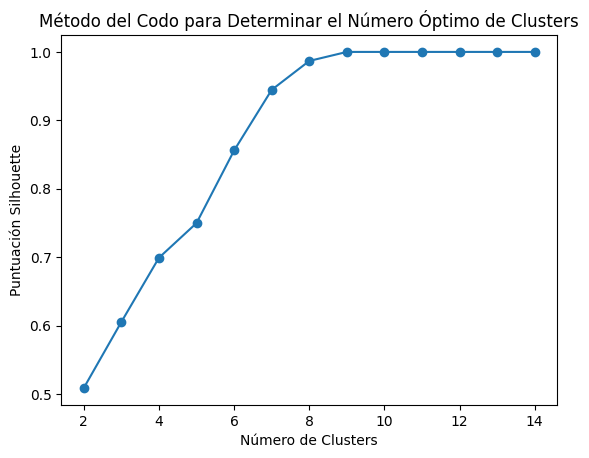

In [273]:
#Ahora, imprimimos la silueta
# Calcular la puntuaci√≥n silhouette para un rango de clusters
silhouette_scores = []
range_n_clusters = range(2, 15)  # Probamos desde 2 hasta 10 clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

import matplotlib.pyplot as plt
# Mostrar gr√°fico
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('N√∫mero de Clusters')
plt.ylabel('Puntuaci√≥n Silhouette')
plt.title('M√©todo del Codo para Determinar el N√∫mero √ìptimo de Clusters')
plt.show()


#El que tenga mayor puntaje es la mejor cantidad de cluster, en el caso, como vemos en la imagen, es 3 (que tiene puntaje de 0.3700)

ü§îü§ì Como podemos observar, **aunque nuestra putuaci√≥n Silhouette era aceptable, plantear tres clusters no era lo m√°s adecuado** pues, lo que nos recomienda el m√©todo del codo es seguir aumentando el n√∫mero de clusters para aumentar la eficiencia de nuestra clasificaci√≥n. Esto era algo esperable debido a la superposici√≥n de nuestros casos, algo que mencionamos l√≠neas m√°s arriba.

üëâ‚úÖ Otra cosa que debemos rescatar del gr√°fico del m√©todo del codo es que **a partir de nueve clusters, la eficiencia llega a 1**. Es decir, nueve clusters es lo m√°s eficiente. ¬øPor qu√© ocurre esto? Porque en el punto de plantear nueve clusters, lo que modelo hace es cruzar cada una de las categor√≠as de una variable, con cada una de las categor√≠as de la otra variable: **al tener tres categor√≠as es cada una, el resultado de esto es un "3 x 3"**.

üëâ‚ùì Por tal raz√≥n, llegado aqu√≠, **debemos tomar una decisi√≥n**. Como no podemos aumentar a nueve el n√∫mero de clusters pues perder√≠a utilidad, tenemos que decidir si la actual clusterizaci√≥n en tres grupos es coherente y nos sirve. Veamos la siguiente imagen en la que cruzamos los valores de nuestras categor√≠as y se√±alamos la clusterizaci√≥n que nos arroj√≥ el modelo:

**IMAGEN 1: CRUCE DE VARIABLES SEG√öN CLUSTERIZACI√ìN EN 3 GRUPOS**


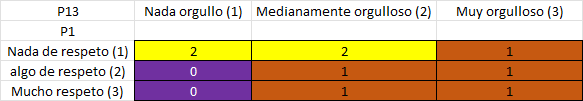

üëâü§ì En la **IMAGEN 1** podemos observar en qu√© cluster qued√≥ cada cruce de categor√≠as seg√∫n nuestro modelo de K-means. Un primer grupo (cluster 0) es aquel conformado por personas que tienen respeto por las instituciones, pero no est√°n orgullos del sistema pol√≠tico peruano. Un segundo grupo (cluster 2) est√° compuestyo de personas que no sienten que las instituciones merezcan respeto y que, o no sienten orgullo por el sistema pol√≠tico, o solo sienten un nivel medio de orgullo. Y finalmente, el resto, en el que se clasific√≥ a personas que sienten respeto (entre algo y mucho respeto) y adem√°s est√°n orgullos (entre medianamente orgullosos y muy orgullosos); en este cluster tambi√©n fue clasificado  el √∫nico perfil extra√±o: los que no sienten respeto, pero est√°n orgullosos del sistema pol√≠tico.

üîç En principio, **este modo de clusterizaci√≥n no es problem√°tico salvo por lo correspondiente al perfil extra√±o. Veamos qu√© pasa si aumentamos a 4 el n√∫mero de clusters**.

In [274]:
# Seleccionar caracter√≠sticas relevantes para el agrupamiento
features = ['P1', 'P13']


# Escalar las caracter√≠sticas para que tengan media 0 y varianza 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(jovenes[features])

# Aplicar K-Means con 4 grupos
kmeans = KMeans(n_clusters=4, random_state=100)
jovenes['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [275]:
# Visualizar los grupos encontrados
fig = px.scatter(jovenes, x='P1', y='P13', color='Cluster', title='FIGURA 2: Agrupamiento se Respeto por las instituciones y Orgullo por el sistema pol√≠tico peruano en j√≥venes - 4 clusters')
fig.show()

**IMAGEN 2: CRUCE DE VARIABLES SEG√öN CLUSTERIZACI√ìN EN 4 GRUPOS**

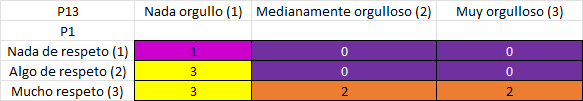

‚úÖüòé Para el caso de cuatro clusters, un primer grupo (cluster 0) est√° conformado por personas que no siente o sienten algo de respeto, pero tienen por lo menos algo de orgullo por el sistema pol√≠tico; es decir, tienden a sentir que las instituciones no son dignas de respeto, pero eso no impide que no sienta por lo menos algo de orgullo por el sistema pol√≠tico. Luego est√° el cluster 1 que est√° conformado por personas que sienten que las instituciones no son dignas de respeto y que no sienten orgullo por el sistema pol√≠tico. Por otro lado, el cluster 2 est√° conformado por personas que sienten mucho respeto por las instituciones y tienen tendencia a sentir orgullo por el sistema pol√≠tico (llegando a sentir mucho orgullo en algunos casos). Y finalmente, el cluster 3, integrado por personas que tienen tendencia a sentir respeto (llegando a sentir mucho respeto), pero lamentablemente no est√°n orgullosos del sistema pol√≠tico.

‚úÖüòé Tras haber hecho esta interpretaci√≥n, **podemos decir que este modelo de cuatro clusters es mucho m√°s viable que el de tres y m√°s acotado**; adem√°s de guardar coherencia. Veamos la puntuaci√≥n de la silueta que nos arroja:

In [276]:
# Calcular la puntuaci√≥n silhouette
puntuacion_silhouette = silhouette_score(scaled_data, kmeans.labels_)
# Mostrar la puntuaci√≥n silhouette
print("Puntuaci√≥n Silhouette:", puntuacion_silhouette)
# Tabla de grupos encontrados
tabla_grupos = jovenes.groupby('Cluster')[['P1','P13']].mean()
print(tabla_grupos)

Puntuaci√≥n Silhouette: 0.6991364278120089
               P1       P13
Cluster                    
0        1.772414  2.131034
1        1.000000  1.000000
2        3.000000  2.419355
3        2.280303  1.000000


Es una **puntuaci√≥n aceptable de 0.69**. Calculemos el porcentaje de personas que ser√° ubicada en cada cluster de acuerdo con nuestro modelo.

In [278]:
#Ahora dise√±amos un segundo gr√°fico en el que podamos ver la distruci√≥n de g√©nero por edades. Para ello, debemos seguir varios pasos

#Primero, agrupamos el dataset por edades y g√©nero y contamos las unidades por cada grupo
conteo_cluster = jovenes.groupby(['Cluster']).size().reset_index(name='Conteo')
porcentaje_cluster = conteo_cluster.Conteo * 100/484
porcentaje_cluster = porcentaje_cluster.round(2)
conteo_cluster['Porcentaje'] = porcentaje_cluster
conteo_cluster['Porcentaje'] = conteo_cluster['Porcentaje'].apply(lambda x: '{:.2f}%'.format(x))

# Renombrar los valores de los clusters
conteo_cluster['Cluster'] = conteo_cluster['Cluster'].replace({0: 'Tienden a no sentir respeto por las inst., pero est√°n orgullosos del sist. pol.',
                                                              1: 'No sienten respeto por las inst. ni orgullo por el sist. pol.',
                                                              2: 'Sienten respeto por las inst. y orgullo por el sist. pol.',
                                                              3: 'Sienten respeto por las inst., pero no est√°n orgullosos del sist. pol.'})

# Gr√°fico de barras con valores de porcentaje
fig = px.bar(conteo_cluster, x='Cluster', y='Conteo', text='Porcentaje',
             title='FIGURA 3: Distribuci√≥n de clusters',
             labels={'Cluster': 'Cluster', 'Conteo': 'N√∫mero de personas'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

# Actualizar el dise√±o para mostrar los valores de porcentaje encima de las barras
fig.update_traces(textposition='outside', texttemplate='%{text}')

# A√±adir colores diferentes a las barras
fig.update_traces(marker_color=['#7030A0', '#CC00CC', '#ED7D31', '#FFD966'])

# Mostrar el gr√°fico
fig.show()

üó£Ô∏è‚úÖ Para dise√±ar este gr√°fico, aprovechamos para renombrar los clusters por una peque√±a descripci√≥n de las personas que conforman el cluster. Como podemos observar en la **FIGURA 3**, los j√≥venes del cluster 0 (Tienden a no sentir respeto por las instituciones, pero est√°n orgullosos del sistema pol√≠tico) son la mayor√≠a, alcanzando un 29.96%. Les siguen los j√≥venes del cluster 3 (Sienten respeto por las instituciones, pero no est√°n orgullosos del sistema pol√≠tico) con un 27.27%. Luego est√°n los j√≥venes del cluster 1 (No sienten respeto por las instituciones ni orgullo por el sistema pol√≠tico) con un 23.55%; estos son los j√≥venes m√°s desencantados con ambas variables. Y finalmente, est√°n los j√≥venes del cluster 2 (Sienten respeto por las instituciones y orgullo por el sistema pol√≠tico) con un 19.21%. Estos √∫ltimos son los que eval√∫an bien tanto a las instituciones como al sistema pol√≠tico peruano y, como podemos observar, aunque son el grupo m√°s peque√±o, tienen un tama√±o destacable teniendo en cuenta las variables analizadas antes.

# Conclusiones

Decidimos hacer un an√°lisis m√°s profundo del grupo etario de 18 a 29 a√±os (j√≥venes) pues es un grupo considerable dentro de la poblaci√≥n peruana y, al constituirse como los principales actores civiles del ma√±ana, es importante tener en cuenta las opiniones que tengan en el presente.

En la primera parte de este notebook hicimos una breve descripci√≥n de la muestra en general, y luego hicimos una m√°s espec√≠fica para los j√≥venes peruanos. En una segunda parte contrastamos nuestras hip√≥tesis y logramos corroboralas. Posteriormente hicimos una descripci√≥n de lo que respondieron los j√≥venes en algunas preguntas de nuestro inter√©s y que hab√≠amos seleccionado al principio.

Finalmente, utilizamos el machine learning para clasificar a los j√≥venes peruanos y ahorrarnos el tiempo de pensar una clasificaci√≥n teniendo en cuenta dos variables: P13 (orgullo por el sistema pol√≠tico) y P9 (respeto por las instituciones pol√≠ticas). Gracias a ello, pudimos plantear un tipolog√≠a de j√≥venes de acuerdo con el cruce de esas dos variables:
* Quienes tienden a no sentir respeto por las instituciones, pero est√°n orgullosos del sistema pol√≠tico
* Quienes no sienten respeto por las instituciones ni orgullo por el sistema pol√≠tico
* Quienes sienten respeto por las instituciones y orgullo por el sistema pol√≠tico
* Quienes sienten respeto por las instituciones, pero no est√°n orgullosos del sistema pol√≠tico

Esta tipolog√≠a es meramente te√≥rica e ilustrativa, y nos ayuda a pensar un modo en el que los j√≥venes peruanos del 2023 pueden ser clasificados seg√∫n dichas variables.